In [2]:
# 파이썬의 import를 활용해 데이터 분석용 패키지인 판다스(Pandas)를 읽어옵니다.
import pandas as pd

## 데이터 로딩하기

먼저 데이터를 로딩해오겠습니다. 데이터를 읽어올때는 [판다스(Pandas)](https://pandas.pydata.org/)의 [read_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) 라는 기능을 사용합니다.

여기서 파일의 경로를 지정하는 방법에 주의하셔야 합니다. read_csv를 실행할 때 (**FileNotFoundError**)라는 이름의 에러가 난다면 경로가 제대로 지정이 되지 않은 것입니다. 만일 파일의 경로를 지정하는 법이 생각나지 않는다면 [다음의 링크](http://88240.tistory.com/122)를 통해 경로를 지정하는 법을 복습해주세요.

In [3]:
# noom.csv 파일을 읽어옵니다.
# 이 데이터는 사용자의 프로필(성별, 나이 등)과 구매 정보 등을 담고 있습니다.
# 또한 이 과정에서 구매 날짜(Purchased At)는 별도로 날짜 컬럼으로 해석할 수 있게 parse_dates 옵션에 추각합니다.
# 이 결과를 raw_data라는 이름의 변수에 할당합니다.
raw_data = pd.read_csv("data/noom/noom_user.csv", parse_dates=["Purchased At"])

# 읽어온 데이터의 컬럼명을 출력합니다.
print(raw_data.columns)

# raw_data 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(raw_data.shape)

# .head()로 data 데이터의 상위 5개를 띄웁니다.
raw_data.head()

Index(['Access Code', 'Name', 'Gender', 'Age', 'Height', 'Initial Weight',
       'Lowest Weight', 'Target Weight', 'Product Name', 'Status', 'Price',
       'Purchased At', 'Payment Type', 'Channel'],
      dtype='object')
(10000, 14)


,Access Code,Name,Gender,Age,Height,Initial Weight,Lowest Weight,Target Weight,Product Name,Status,Price,Purchased At,Payment Type,Channel
0,Y9RY2VSI,김승혜,FEMALE,25.0,172.0,66.9,65.8,55.000000,눔 체중감량 프로그램,completed,112500,2017-04-14 19:03:29.976,Recurring,others
1,3GTN3S3B,허승준,MALE,26.0,176.0,70.0,NaN,65.000000,눔 체중감량 프로그램,completed,44780,2017-05-23 20:53:54.368,Recurring,others
2,6B0IG276,이지민,FEMALE,23.0,171.0,98.0,NaN,91.140000,눔 체중감량 프로그램 (천원 체험),completed,132000,2017-08-23 23:39:21.840,Recurring,facebook
3,EMGRU2MO,장설윤,FEMALE,20.0,160.0,70.7,NaN,53.000000,눔 체중감량 프로그램 (천원 체험),completed,112500,2017-08-28 20:18:22.824,Recurring,naver
4,1ELG96TX,서성빈,FEMALE,28.0,165.0,55.5,NaN,51.615002,눔 체중감량 프로그램,completed,44780,2017-05-07 17:50:30.944,Recurring,facebook


컬럼에 대한 설명은 다음과 같습니다.

  * **Access Code** - 고객의 접근 코드, 쉽게 말해 고객을 식별할 수 있는 정보라고 보면 됩니다.
  * **Name** - 고객의 이름입니다. 한글로 되어있습니다.
  * **Gender** - 고객의 성별입니다. MALE과 FEMALE, 그리고 빈 값(NaN)으로 되어있습니다.
  * **Age** - 고객의 나이입니다.
  * **Height** - 고객의 키입니다. cm 기준입니다.
  * **Initial Weight** - 고객이 처음 눔 코치에 회원 가입 했을 당시의 몸무게입니다. kg 기준입니다.
  * **Lowest Weight** - 고객이 눔 코치를 이용하는 동안 측정한 몸무게 중, 가장 낮은 몸무게입니다. kg 기준입니다.
  * **Target Weight** - 고객이 눔 코치를 처음 회원 가입할 때 설정한 목표 몸무게입니다. kg 기준입니다.
  * **Product Name** - 눔 코치 프로그램의 상세 제품명입니다.
  * **Status** - 고객의 유료 서비스 결제 현황입니다. 결제중(complete), 결제 취소(cancelled), 환불 완료(refunded)로 되어있습니다.
  * **Price** - 서비스를 구입할 당시의 가격입니다. 원(₩) 기준입니다.
  * **Purchased At** - 서비스를 구입할 당시의 시간입니다.
  * **Payment Type** - 결제 방식입니다. 현재는 Recurring(구독형 결제)만 있습니다.
  * **Channel** - 서비스 구입 경로입니다. 구글, 페이스북, 네이버 등 다양한 경로를 통해 서비스를 구입하고 있습니다.
  


## 데이터 정리하기

데이터 분석을 하는데 있어서 가장 중요한 업무는 데이터를 정리(Data Cleaning)하는 일입니다. 현업에서 활동하는 데이터 분석가(Data Analyst)는 전체 업무 시간의 50% ~ 70%를 데이터를 정리하는데 사용합니다.

만일 파이썬과 판다스를 능숙하게 사용할 수 있다면 남들보다 빠르게 데이터를 정리하고 분석할 수 있습니다. 반면 파이썬과 판다스를 능숙하게 사용할 수 없다면, 남들보다 데이터를 정리하는데 시간이 오래 걸리게 되고 이는 곧 생산성의 차이로 이어집니다. 그러므로 빠른 시간 안에 효율적으로 데이터를 정리하는 스킬은 무엇보다도 중요합니다.

먼저 눔(Noom)의 데이터에서 정리가 필요한 몇몇 부분을 다뤄보겠습니다.

**1. 전체 컬럼에서 필요한 컬럼만 가져오세요.**

데이터를 분석할 때, 대부분의 경우 읽어온 컬럼 전체를 사용하는 경우는 없습니다. 그러므로 데이터를 분석하기 전에 사용하지 않는 컬럼을 사전에 정리해주면 더 편리하게 데이터를 분석할 수 있습니다.

이번 데이터 분석에서 필요한 컬럼은 다음과 같습니다.

 * ```Access Code```
 * ```Name```
 * ```Gender```
 * ```Age```
 * ```Height```
 * ```Initial Weight```
 * ```Lowest Weight```
 * ```Target Weight```
 * ```Status```
 * ```Price```
 * ```Purchased At```
 * ```Channel```

이 컬럼을 제외한 나머지 컬럼을 제거해주세요.

또한 위 컬럼에서 ```Access Code```를 인덱스(Index)로 지정해주세요. 최종적으로는 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe">
    <thead>
        <tr style="text-align: right;">
            <th></th>
            <th>Name</th>
            <th>Gender</th>
            <th>Age</th>
            <th>Height</th>
            <th>Initial Weight</th>
            <th>Lowest Weight</th>
            <th>Target Weight</th>
            <th>Status</th>
            <th>Price</th>
            <th>Purchased At</th>
            <th>Channel</th>
        </tr>
        <tr>
            <th>Access Code</th>
            <th></th>
            <th></th>
            <th></th>
            <th></th>
            <th></th>
            <th></th>
            <th></th>
            <th></th>
            <th></th>
            <th></th>
            <th></th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <th>Y9RY2VSI</th>
            <td>김승혜</td>
            <td>FEMALE</td>
            <td>25.0</td>
            <td>172.0</td>
            <td>66.9</td>
            <td>65.8</td>
            <td>55.000000</td>
            <td>completed</td>
            <td>112500</td>
            <td>2017-04-14 19:03:29.976</td>
            <td>others</td>
        </tr>
        <tr>
            <th>3GTN3S3B</th>
            <td>허승준</td>
            <td>MALE</td>
            <td>26.0</td>
            <td>176.0</td>
            <td>70.0</td>
            <td>NaN</td>
            <td>65.000000</td>
            <td>completed</td>
            <td>44780</td>
            <td>2017-05-23 20:53:54.368</td>
            <td>others</td>
        </tr>
        <tr>
            <th>6B0IG276</th>
            <td>이지민</td>
            <td>FEMALE</td>
            <td>23.0</td>
            <td>171.0</td>
            <td>98.0</td>
            <td>NaN</td>
            <td>91.140000</td>
            <td>completed</td>
            <td>132000</td>
            <td>2017-08-23 23:39:21.840</td>
            <td>facebook</td>
        </tr>
        <tr>
            <th>EMGRU2MO</th>
            <td>장설윤</td>
            <td>FEMALE</td>
            <td>20.0</td>
            <td>160.0</td>
            <td>70.7</td>
            <td>NaN</td>
            <td>53.000000</td>
            <td>completed</td>
            <td>112500</td>
            <td>2017-08-28 20:18:22.824</td>
            <td>naver</td>
        </tr>
        <tr>
            <th>1ELG96TX</th>
            <td>서성빈</td>
            <td>FEMALE</td>
            <td>28.0</td>
            <td>165.0</td>
            <td>55.5</td>
            <td>NaN</td>
            <td>51.615002</td>
            <td>completed</td>
            <td>44780</td>
            <td>2017-05-07 17:50:30.944</td>
            <td>facebook</td>
        </tr>
    </tbody>
</table>

In [4]:
# data에서 필요한 컬럼만 리스트업해서 파이썬 리스트로 만듭니다.
# 이 결과를 columns라는 이름의 변수로 저장합니다.
columns = [
    "Access Code",
    "Name",
    "Gender",
    "Age",
    "Height",
    "Initial Weight",
    "Lowest Weight",
    "Target Weight",
    "Status",
    "Price",
    "Purchased At",
    "Channel",
]

# 원본 데이터에서 필요한 컬럼만 가져옵니다.
# 이 결과를 복사하여(copy) data라는 이름의 변수로 저장합니다.
data = raw_data[columns].copy()

# Access Code 컬럼을 인덱스로 지정합니다. 이제 Access Code를 통해 고객 정보(=row)를 가져올 수 있습니다.
data = data.set_index("Access Code")

# data 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(data.shape)

# .head()로 data 데이터의 상위 5개를 띄웁니다.
data.head()

(10000, 11)


,Name,Gender,Age,Height,Initial Weight,Lowest Weight,Target Weight,Status,Price,Purchased At,Channel
Access Code,,,,,,,,,,,
Y9RY2VSI,김승혜,FEMALE,25.0,172.0,66.9,65.8,55.000000,completed,112500,2017-04-14 19:03:29.976,others
3GTN3S3B,허승준,MALE,26.0,176.0,70.0,NaN,65.000000,completed,44780,2017-05-23 20:53:54.368,others
6B0IG276,이지민,FEMALE,23.0,171.0,98.0,NaN,91.140000,completed,132000,2017-08-23 23:39:21.840,facebook
EMGRU2MO,장설윤,FEMALE,20.0,160.0,70.7,NaN,53.000000,completed,112500,2017-08-28 20:18:22.824,naver
1ELG96TX,서성빈,FEMALE,28.0,165.0,55.5,NaN,51.615002,completed,44780,2017-05-07 17:50:30.944,facebook


**2. 성별 컬럼을 정리해주세요.**

성별 컬럼(```Gender```)을 자세히 보시면, 크게 세 가지 종류가 있습니다.

In [5]:
# 성별(Gender) 컬럼에서 중복된 값을 제거합니다.
# 최종적으로 성별 컬럼의 종류가 나옵니다. (nan은 Not a Number, 즉 값이 없다는 의미입니다)
data["Gender"].unique()

array(['FEMALE', 'MALE', nan], dtype=object)

여기에서 남성과 여성을 굳이 대문자로 사용할 필요는 없을 것으로 보입니다. 가독성을 높이기 위해, 대문자로 되어있는 텍스트를 소문자로 변경해주세요. 가령 FEMALE은 female로, MALE은 male로 변경해주면 됩니다. 또한 원본을 훼손시키지 않기 위해, ```Gender``` 컬럼이 아닌 ```Gender(clean)```이라는 새로운 이름의 컬럼에 넣어주세요. 최종적으로 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
   <thead>
      <tr style="text-align: right;">
         <th></th>
         <th>Name</th>
         <th>Gender</th>
         <th>Gender(clean)</th>
      </tr>
      <tr>
         <th>Access Code</th>
         <th></th>
         <th></th>
         <th></th>
      </tr>
   </thead>
   <tbody>
      <tr>
         <th>Y9RY2VSI</th>
         <td>김승혜</td>
         <td>FEMALE</td>
         <td>female</td>
      </tr>
      <tr>
         <th>3GTN3S3B</th>
         <td>허승준</td>
         <td>MALE</td>
         <td>male</td>
      </tr>
      <tr>
         <th>6B0IG276</th>
         <td>이지민</td>
         <td>FEMALE</td>
         <td>female</td>
      </tr>
      <tr>
         <th>EMGRU2MO</th>
         <td>장설윤</td>
         <td>FEMALE</td>
         <td>female</td>
      </tr>
      <tr>
         <th>1ELG96TX</th>
         <td>서성빈</td>
         <td>FEMALE</td>
         <td>female</td>
      </tr>
   </tbody>
</table>

또한 ```Gender``` 컬럼을 정리한 뒤, 전체 가입자중 남성의 비율과 여성의 비율을 계산해주세요. 최종적으로는 **1) 여성 가입자가 8846명, 2) 남성 가입자가 1023명**이 되어야 합니다.

In [6]:
# 성별(Gender)가 여성(FEMALE)인 데이터를 찾아와
# Gender(clean) 컬럼에 female이라는 값을 추가합니다.
data.loc[data["Gender"] == "FEMALE", "Gender(clean)"] = "female"

# 비슷한 방식으로 성별(Gender)가 남성(MALE)인 데이터를 찾아와
# Gender(clean) 컬럼에 male이라는 값을 추가합니다.
data.loc[data["Gender"] == "MALE", "Gender(clean)"] = "male"

# data 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(data.shape)

# .head()로 Gender 컬럼과 Gender(clean) 컬럼의 상위 5개를 띄웁니다.
data[["Name", "Gender", "Gender(clean)"]].head()

(10000, 12)


,Name,Gender,Gender(clean)
Access Code,,,
Y9RY2VSI,김승혜,FEMALE,female
3GTN3S3B,허승준,MALE,male
6B0IG276,이지민,FEMALE,female
EMGRU2MO,장설윤,FEMALE,female
1ELG96TX,서성빈,FEMALE,female


In [7]:
# 이렇게 판다스(Pandas)의 replace를 사용하는 것도 가능합니다.
data["Gender(clean)"] = data["Gender"].replace("FEMALE", 'female').replace("MALE", 'male')

# data 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(data.shape)

# .head()로 Gender 컬럼과 Gender(clean) 컬럼의 상위 5개를 띄웁니다.
data[["Name", "Gender", "Gender(clean)"]].head()

(10000, 12)


,Name,Gender,Gender(clean)
Access Code,,,
Y9RY2VSI,김승혜,FEMALE,female
3GTN3S3B,허승준,MALE,male
6B0IG276,이지민,FEMALE,female
EMGRU2MO,장설윤,FEMALE,female
1ELG96TX,서성빈,FEMALE,female


In [8]:
# .value_counts()로
# 여성(female)의 총 인원과 남성(male)의 총 인원을 구합니다.
data["Gender(clean)"].value_counts()

female    8846
male      1023
Name: Gender(clean), dtype: int64

**3. 키 컬럼을 정리해주세요.**

키(```Height```) 컬럼도 성별 컬럼과 같이 정리가 필요해보입니다. 가령 전체 눔 사용자중 가장 키가 작은 사람을 찾는다면, 다음의 결과가 나옵니다.

In [9]:
# Height 컬럼에서 가장 작은(min) 값을 찾아와서 출력합니다.
data["Height"].min()

-1.0

하지만 모두가 알다싶이 키가 -1 cm인 사람은 존재하지 않습니다. 추측컨데, 데이터를 저장하는 담당자가 편의를 위해 키를 입력하지 않은 사용자를 NaN이 아닌 -1.0으로 기입한 것 같습니다. 이 경우 데이터를 저장하는데는 편리하지만, 데이터를 분석할 경우 통계치가 잘못 나올 가능성이 있습니다. (가령 평균 키를 계산하면 실제 평균보다 -1.0씩 밀리겠죠)

그러므로 원활한 분석을 위해서는 키 컬럼을 정리해줄 필요가 있습니다. 키가 -1 cm인 사람은 NaN으로 데이터를 넣어주세요. 최종적으로는 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
   <thead>
      <tr style="text-align: right;">
         <th></th>
         <th>Name</th>
         <th>Height</th>
         <th>Height(clean)</th>
      </tr>
      <tr>
         <th>Access Code</th>
         <th></th>
         <th></th>
         <th></th>
      </tr>
   </thead>
   <tbody>
      <tr>
         <th>O4OWMJG7</th>
         <td>오세윤</td>
         <td>-1.0</td>
         <td>NaN</td>
      </tr>
      <tr>
         <th>H6EV5AXL</th>
         <td>박슬지</td>
         <td>-1.0</td>
         <td>NaN</td>
      </tr>
      <tr>
         <th>O1IAZS7A</th>
         <td>고솔윤</td>
         <td>-1.0</td>
         <td>NaN</td>
      </tr>
      <tr>
         <th>5NEQOWHW</th>
         <td>손초영</td>
         <td>-1.0</td>
         <td>NaN</td>
      </tr>
      <tr>
         <th>OFAXUNXD</th>
         <td>백채우</td>
         <td>-1.0</td>
         <td>NaN</td>
      </tr>
   </tbody>
</table>

또한 위 내용을 바탕으로 1) 최소/최대/평균 키를 구하고, 2) 남성/여성별 평균 키를 구해주세요.

가령 현재 키가 가장 작은 사용자는 106.0cm이며, 가장 큰 사용자는 203.2cm, 평균 키는 약 163.54cm 입니다. 남성의 평균 키와 여성의 평균 키는 다음과 같습니다.
<table border="1" class="dataframe" style="float: left;">
   <thead>
      <tr style="text-align: right;">
         <th></th>
         <th>Height(clean)</th>
      </tr>
      <tr>
         <th>Gender(clean)</th>
         <th></th>
      </tr>
   </thead>
   <tbody>
      <tr>
         <th>female</th>
         <td>162.116913</td>
      </tr>
      <tr>
         <th>male</th>
         <td>175.831965</td>
      </tr>
   </tbody>
</table>

In [10]:
# 파이썬에서 수학 연산을 담당하는 numpy라는 패키지를 가져옵니다.
# 이를 np라는 축약어로 사용합니다.
import numpy as np

# Height 컬럼을 그대로 복사한 Height(clean) 라는 이름의 컬럼을 만듭니다.
data["Height(clean)"] = data["Height"]

# Height(clean) 컬럼은, Height 의 값이 0보다 작을 때(가령 -1일 때) 이 값을 NaN으로 바꿔줍니다.
data.loc[data["Height"] < 0, "Height(clean)"] = np.nan

# Height 의 값이 0보다 작은 데이터만 가져와서,
# .head()로 Height 컬럼과 Height(clean) 컬럼의 상위 5개를 띄웁니다.
data.loc[data["Height"] < 0, ["Name", "Height", "Height(clean)"]].head()

,Name,Height,Height(clean)
Access Code,,,
O4OWMJG7,오세윤,-1.0,NaN
H6EV5AXL,박슬지,-1.0,NaN
O1IAZS7A,고솔윤,-1.0,NaN
5NEQOWHW,손초영,-1.0,NaN
OFAXUNXD,백채우,-1.0,NaN


In [11]:
# 이렇게 판다스(Pandas)의 replace를 사용하는 것도 가능합니다.
# 다음의 코드는 키(Height)가 -1인 데이터를 NaN으로 변환합니다.
# 그리고 Height(clean)라는 이름의 컬럼에 값을 할당합니다.
data["Height(clean)"] = data["Height"].replace(-1, np.nan)

# Height 의 값이 0보다 작은 데이터만 가져와서,
# .head()로 Height 컬럼과 Height(clean) 컬럼의 상위 5개를 띄웁니다.
data.loc[data["Height"] < 0, ["Name", "Height", "Height(clean)"]].head()

,Name,Height,Height(clean)
Access Code,,,
O4OWMJG7,오세윤,-1.0,NaN
H6EV5AXL,박슬지,-1.0,NaN
O1IAZS7A,고솔윤,-1.0,NaN
5NEQOWHW,손초영,-1.0,NaN
OFAXUNXD,백채우,-1.0,NaN


In [12]:
# Height(clean) 컬럼에서 가장 작은 값(min)을 가져옵니다.
data["Height(clean)"].min()

106.0

In [13]:
# Height(clean) 컬럼에서 가장 큰 값(max)을 가져옵니다.
data["Height(clean)"].max()

203.2

In [14]:
# Height(clean) 컬럼의 평균 값(mean)을 가져옵니다.
data["Height(clean)"].mean()

163.54161860276196

In [15]:
# .describe()를 사용하면 위 내용을 한 번에 가져올 수 있습니다.
data["Height(clean)"].describe()

count    9848.000000
mean      163.541619
std         6.828374
min       106.000000
25%       159.000000
50%       163.000000
75%       167.000000
max       203.200000
Name: Height(clean), dtype: float64

In [16]:
# pandas의 pivot table을 사용합니다.
# 세로(index)에는 성별(Gender(clean))을, 가로(values)에는 키(Height(clean))를 지정합니다.
# 최종적으로 남성/여성의 평균 키가 출력됩니다.
pd.pivot_table(data, index="Gender(clean)", values="Height(clean)")

,Height(clean)
Gender(clean),
female,162.116913
male,175.831965


**4. 나이 컬럼을 정리해주세요.**

3번과 비슷한 이유로, 나이(```Age```) 컬럼도 정리를 해야될 것 같습니다. 가령 전체 눔 사용자 중에서, 가장 나이가 어린 사람과 가장 나이가 많은 사람은 다음과 같습니다.

In [17]:
# 가장 나이가 어린 고객을 찾습니다.
# 결과는 0세라고 나오지만, 0세 사용자가 이 서비스를 사용할 가능성은 없습니다.
# 즉, 이 데이터는 잘못 기입된 데이터라고 판단할 수 있습니다.
data["Age"].min()

0.0

In [18]:
# 비슷하게 가장 나이가 많은 고객을 찾습니다.
# 결과는 173세라고 나오는데, 이 데이터도 잘못 기입되었다고 판단할 수 있습니다.
data["Age"].max()

173.0

그러므로 이번에도 나이 컬럼을 정리해줄 필요가 있습니다. 다음의 규칙에 맞춰서 나이 컬럼을 정리해주세요.

  * 나이가 0인 데이터는 NaN으로 변경
  * 나이가 60세 이상인 데이터는 NaN으로 변경
  
최종적으로는 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
   <thead>
      <tr style="text-align: right;">
         <th></th>
         <th>Name</th>
         <th>Age</th>
         <th>Age(clean)</th>
      </tr>
      <tr>
         <th>Access Code</th>
         <th></th>
         <th></th>
         <th></th>
      </tr>
   </thead>
   <tbody>
      <tr>
         <th>9PTGVW4B</th>
         <td>강서연</td>
         <td>0.0</td>
         <td>NaN</td>
      </tr>
      <tr>
         <th>ACV6D35S</th>
         <td>윤우성</td>
         <td>0.0</td>
         <td>NaN</td>
      </tr>
      <tr>
         <th>Y0OK1FWA</th>
         <td>김서영</td>
         <td>85.0</td>
         <td>NaN</td>
      </tr>
      <tr>
         <th>WX34HGBL</th>
         <td>강채민</td>
         <td>0.0</td>
         <td>NaN</td>
      </tr>
      <tr>
         <th>R9XCS81F</th>
         <td>최유신</td>
         <td>0.0</td>
         <td>NaN</td>
      </tr>
   </tbody>
</table>

또한 위 내용을 바탕으로 1) 최소/최대/평균 나이를 구하고, 2) 남성/여성별 평균 나이를 구해주세요.

가령 현재 나이가 가장 어린 사용자는 13세이며, 반대로 가장 나이가 많은 사용자는 59세, 그리고 평균 나이는 약 27.38세 입니다. 남성의 평균 나이와 여성의 평균 나이는 다음과 같습니다.

<table border="1" class="dataframe" style="float: left;">
   <thead>
      <tr style="text-align: right;">
         <th></th>
         <th>Age(clean)</th>
      </tr>
      <tr>
         <th>Gender(clean)</th>
         <th></th>
      </tr>
   </thead>
   <tbody>
      <tr>
         <th>female</th>
         <td>27.172929</td>
      </tr>
      <tr>
         <th>male</th>
         <td>29.309127</td>
      </tr>
   </tbody>
</table>

In [19]:
# 나이(Age) 컬럼의 내용을 그대로 복사한 Age(clean) 라는 컬럼을 만듭니다.
data["Age(clean)"] = data["Age"]

# 나이가 0세인 사용자를 찾아서, Age(clean)에 NaN을 기입합니다.
data.loc[data["Age"] == 0, "Age(clean)"] = np.nan

# 비슷하게 나이가 60세 이상인 사용자를 찾아서, Age(clean)에 NaN을 기입합니다.
data.loc[data["Age"] >= 60, "Age(clean)"] = np.nan

# data 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(data.shape)

# 나이가 0세이거나 60세 이상인 데이터를 찾아서,
# Age 컬럼과 Age(clean) 컬럼의 상위 5개를 출력합니다.
data.loc[(data["Age"] == 0) | (data["Age"] >= 60), ["Name", "Age", "Age(clean)"]].head()

(10000, 14)


,Name,Age,Age(clean)
Access Code,,,
9PTGVW4B,강서연,0.0,NaN
ACV6D35S,윤우성,0.0,NaN
Y0OK1FWA,김서영,85.0,NaN
WX34HGBL,강채민,0.0,NaN
R9XCS81F,최유신,0.0,NaN


In [20]:
# Age (clean) 컬럼에서 가장 작은 값(min)을 가져옵니다.
data["Age(clean)"].min()

13.0

In [21]:
# Age(clean) 컬럼에서 가장 큰 값(min)을 가져옵니다.
data["Age(clean)"].max()

59.0

In [22]:
# Age(clean) 컬럼의 평균값(mean)을 가져옵니다.
data["Age(clean)"].mean()

27.39381024860477

In [23]:
# pandas의 pivot table을 사용합니다.
# 세로(index)에는 성별(Gender(clean))을, 가로(values)에는 나이(Age(clean))를 지정합니다.
# 최종적으로 남성/여성의 평균 나이가 출력됩니다.
pd.pivot_table(data, index="Gender(clean)", values="Age(clean)")

,Age(clean)
Gender(clean),
female,27.172929
male,29.309127


### VIP 구하기

데이터를 다 정리했으면, 이제 본격적으로 데이터 분석(Data Analysis)을 해보겠습니다.

먼저 운영팀의 요청부터 살펴보겠습니다. 운영팀은 눔 코치를 이용하는 고객 중, 크게 다음의 조건에 해당하는 사람을 찾고 싶습니다.

1. 유료 사용자 중, 사용자 정보를 잘못 기입한 사람
2. 유료 사용자 중, 눔 코치의 VIP 사용자라고 간주할 수 있는 사람

1번 사용자의 경우, 유료 결제를 했으나 사용자 정보(나이, 키, 몸무게 등)가 잘못 기입되어있다면 담당 코치가 정확한 코칭을 제공해 줄 수 없는 문제가 있습니다. 그러므로 운영팀은 가능한 빠르게 정보를 잘못 기입한 고객을 찾아서 다시 기입해달라고 요청할 필요가 있습니다.

2번 사용자의 경우, 눔의 VIP 사용자로서 추가 혜택(ex: 서비스 무료 이용)을 제공해주는 것을 조건으로, 눔 코치를 대표하는 홍보 모델로서 활동해줄 것을 요청할 수 있습니다.

특히나 다이어트 관련 서비스는 VIP 사용자의 Before / After를 보여주는 것 만큼 좋은 홍보 수단은 없습니다. 그러므로 데이터 분석 팀에서 특정 조건(ex: 10kg 이상 감량 성공)에 만족하는 코어 사용자를 찾아내는 것을 중요합니다.

그러므로 눔의 데이터를 활용해, 1) 잘못된 정보를 기입한 사용자(invalid user)와, 눔 코치를 사용하여 큰 성과(ex: 몸무게 감량)를 본 사용자(VIP user)를 찾아보도록 하겠습니다.

**5. 전체 컬럼에서 필요한 컬럼만 가져오세요.**

언제나 데이터를 분석할 때는 전체 데이터를 분석하지 않고 필요한 데이터만 추출해서 분석하는 습관을 들이는 것이 좋습니다. 그러므로 사용하지 않는 컬럼을 제거하도록 하겠습니다.

이번 데이터 분석에서 필요한 컬럼은 다음과 같습니다.

  * ```Name```
  * ```Age(clean)```
  * ```Height(clean)```
  * ```Initial Weight```
  * ```Lowest Weight```
  * ```Target Weight```
  * ```Status```

이 컬럼을 제외한 나머지 컬럼을 제거해주세요. 또한 변함없이 데이터에서 ```Access Code```가 인덱스(Index)로 지정되어 있어야 합니다. 최종적으로는 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
<thead>
   <tr style="text-align: right;">
      <th></th>
      <th>Name</th>
      <th>Age(clean)</th>
      <th>Height(clean)</th>
      <th>Initial Weight</th>
      <th>Lowest Weight</th>
      <th>Target Weight</th>
      <th>Status</th>
   </tr>
   <tr>
      <th>Access Code</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
   </tr>
</thead>
<tbody>
   <tr>
      <th>Y9RY2VSI</th>
      <td>김승혜</td>
      <td>25.0</td>
      <td>172.0</td>
      <td>66.9</td>
      <td>65.8</td>
      <td>55.000000</td>
      <td>completed</td>
   </tr>
   <tr>
      <th>3GTN3S3B</th>
      <td>허승준</td>
      <td>26.0</td>
      <td>176.0</td>
      <td>70.0</td>
      <td>NaN</td>
      <td>65.000000</td>
      <td>completed</td>
   </tr>
   <tr>
      <th>6B0IG276</th>
      <td>이지민</td>
      <td>23.0</td>
      <td>171.0</td>
      <td>98.0</td>
      <td>NaN</td>
      <td>91.140000</td>
      <td>completed</td>
   </tr>
   <tr>
      <th>EMGRU2MO</th>
      <td>장설윤</td>
      <td>20.0</td>
      <td>160.0</td>
      <td>70.7</td>
      <td>NaN</td>
      <td>53.000000</td>
      <td>completed</td>
   </tr>
   <tr>
      <th>1ELG96TX</th>
      <td>서성빈</td>
      <td>28.0</td>
      <td>165.0</td>
      <td>55.5</td>
      <td>NaN</td>
      <td>51.615002</td>
      <td>completed</td>
   </tr>
</tbody>
</table

In [24]:
# data에서 필요한 컬럼만 가져와 파이썬 리스트로 만듭니다.
# 이 결과를 columns라는 이름의 변수로 저장합니다.
columns = ["Name",
           "Age(clean)",
           "Height(clean)",
           "Initial Weight",
           "Lowest Weight",
           "Target Weight",
           "Status"]

# 원본 데이터에서 필요한 컬럼만 가져옵니다.
# 이 결과를 weight_history라는 이름의 변수로 저장합니다.
weight_history = data[columns].copy()

# weight_history 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(weight_history.shape)

# .head()로 weight_history 데이터의 상위 5개를 띄웁니다.
weight_history.head()

(10000, 7)


,Name,Age(clean),Height(clean),Initial Weight,Lowest Weight,Target Weight,Status
Access Code,,,,,,,
Y9RY2VSI,김승혜,25.0,172.0,66.9,65.8,55.000000,completed
3GTN3S3B,허승준,26.0,176.0,70.0,NaN,65.000000,completed
6B0IG276,이지민,23.0,171.0,98.0,NaN,91.140000,completed
EMGRU2MO,장설윤,20.0,160.0,70.7,NaN,53.000000,completed
1ELG96TX,서성빈,28.0,165.0,55.5,NaN,51.615002,completed


**6. 주어진 컬럼으로 다음의 추가 정보를 계산해주세요.**

필요한 컬럼을 가져왔으면, 다음으로는 잘못된 정보를 기입한 사용자와 VIP 사용자를 구분하기 위한 컬럼을 새로 추가하겠습니다. 

다음의 세 가지 정보를 담은 컬럼을 추가해주세요.

  1. ```Weight Loss(goal)``` - 목표 감량치. ```Initial Weight``` 컬럼과 ```Target Weight```의 차이를 나타냅니다. (마이너스가 나올 수 있습니다)
  2. ```Weight Loss(current)``` - 최대 감량치. ```Initial Weight``` 컬럼과 ```Lowest Weight```의 차이를 나타냅니다. (마이너스가 나올 수 있습니다)
  3. 체질량지수(```BMI```) - 키(```Height(clean)```)와 체중(```Initial Weight```)으로 체지방의 양을 추정하는 공식입니다. 구체적인 공식은 다음과 같습니다.

$$
BMI = \frac{체중(kg)}{키(m) \times 키(m)}
$$

PS) 주의: BMI공식에서 사용하는 키는 센치미터(cm)가 아닌 미터(m)라는것에 주의해주세요.

최종적으로는 다음의 결과가 나와야합니다.

<table border="1" class="dataframe" style="float: left;">
   <thead>
      <tr style="text-align: right;">
         <th></th>
         <th>Name</th>
         <th>Weight Loss(goal)</th>
         <th>Weight Loss(current)</th>
         <th>BMI</th>
      </tr>
      <tr>
         <th>Access Code</th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
      </tr>
   </thead>
   <tbody>
      <tr>
         <th>Y9RY2VSI</th>
         <td>김승혜</td>
         <td>11.900000</td>
         <td>1.1</td>
         <td>22.613575</td>
      </tr>
      <tr>
         <th>3GTN3S3B</th>
         <td>허승준</td>
         <td>5.000000</td>
         <td>NaN</td>
         <td>22.598140</td>
      </tr>
      <tr>
         <th>6B0IG276</th>
         <td>이지민</td>
         <td>6.860000</td>
         <td>NaN</td>
         <td>33.514586</td>
      </tr>
      <tr>
         <th>EMGRU2MO</th>
         <td>장설윤</td>
         <td>17.700000</td>
         <td>NaN</td>
         <td>27.617187</td>
      </tr>
      <tr>
         <th>1ELG96TX</th>
         <td>서성빈</td>
         <td>3.884998</td>
         <td>NaN</td>
         <td>20.385675</td>
      </tr>
   </tbody>
</table>

In [25]:
# cm로 기록된 키를 미터(m)로 변환해서 'Height(m)(clean)'라는 이름의 새로운 컬럼에 저장합니다.
weight_history["Height(m)(clean)"] = weight_history["Height(clean)"] / 100

# Initial Weight와 Target Weight를 뺀 뒤, 이를 Weight Loss(goal)라는 이름의 새로운 컬럼에 저장합니다.
weight_history["Weight Loss(goal)"] = weight_history["Initial Weight"] - weight_history["Target Weight"]

# 비슷하게 Initial Weight와 Lowest Weight를 뺀 뒤, 이를 Weight Loss(current)라는 이름의 새로운 컬럼에 저장합니다.
weight_history["Weight Loss(current)"] = weight_history["Initial Weight"] - weight_history["Lowest Weight"]

# BMI수치를 계산합니다. 미터(m)로 기록된 키를 제곱한 뒤 이 값으로 Initial Weight를 나눕니다.
weight_history["BMI"] = weight_history["Initial Weight"] / (weight_history["Height(m)(clean)"] ** 2)

# weight_history 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(weight_history.shape)

# .head()로 weight_history 데이터에서
# Weight Loss(goal), Weight Loss(current), BMI 컬럼의 상위 5개를 띄웁니다.
weight_history[["Name", "Weight Loss(goal)", "Weight Loss(current)", "BMI"]].head()

(10000, 11)


,Name,Weight Loss(goal),Weight Loss(current),BMI
Access Code,,,,
Y9RY2VSI,김승혜,11.900000,1.1,22.613575
3GTN3S3B,허승준,5.000000,NaN,22.598140
6B0IG276,이지민,6.860000,NaN,33.514586
EMGRU2MO,장설윤,17.700000,NaN,27.617187
1ELG96TX,서성빈,3.884998,NaN,20.385675


이제 이 세 가지 정보만 있으면, 정보를 잘못 기입한 사용자(invalid user)와 VIP 사용자를 찾아낼 수 있습니다.

**7. 잘못된 정보를 기입한 사용자(invalid user)를 찾기**

이제 6번 데이터를 활용하여 잘못된 정보를 기입한 사용자를 찾아내겠습니다. 다음의 정보를 기입한 사용자는 잘못된 정보를 기입한 사용자라고 간주하며, Invalid라는 이름의 새로운 컬럼에 True라는 값을 집어넣습니다. (정 반대의 경우에는 False라고 집어넣습니다)

**필수** (다음의 조건을 만족하지 않으면 Invalid값에는 언제나 False가 들어갑니다)
  1. 눔의 프로그램을 결제한 구매자. (```Status == "completed"```)
  
**옵션** (다음의 조건 중 하나라도 만족할 경우 Invalid값에 True가 들어가야 합니다)
  1. 나이(```Age(clean)```), 키(```Height(clean)```)와 몸무게(```Initial Weight```, ```Lowest Weight```, ```Target Weight```) 중 어느 하나라도 NaN이 들어가 있는 경우. 
  1. 키를 너무 작게 기입했거나(140cm 미만)나, 정 반대로 너무 크게(200cm 초과) 기입한 사용자.
  1. BMI수치가 너무 낮거나(18.5 미만) 너무 높은 사용자. (30.0 초과)
  1. 목표 감량치(```Weight Loss(goal)```)가 마이너스인 경우. (보통 현재 체중보다 목표 체중을 낮게 설정합니다)
  
여기서 **눔의 프로그램을 결제한 구매자**에 한해서만 invalid 여부를 구한다는 사실에 주의해주세요. (그 이유에 대해서는 과제 풀이 시간에 설명 드리겠습니다)

또한 이 문제를 너무 어렵게 생각하지 않고, 판다스(Pandas)의 [apply](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html)를 함수를 잘 활용하는 걸 추천드립니다. 그리고 값이 비어있는(NaN) 경우를 찾고 싶다면. 판다스(Pandas)의 [isnull](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.isnull.html)을 활용해주세요.
  
최종적으로 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left">
   <thead>
      <tr style="text-align: right;">
         <th></th>
         <th>Name</th>
         <th>Age(clean)</th>
         <th>Height(clean)</th>
         <th>Initial Weight</th>
         <th>Lowest Weight</th>
         <th>Target Weight</th>
         <th>Status</th>
         <th>Weight Loss(goal)</th>
         <th>Weight Loss(current)</th>
         <th>BMI</th>
         <th>Invalid</th>
      </tr>
      <tr>
         <th>Access Code</th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
      </tr>
   </thead>
   <tbody>
      <tr>
         <th>3GTN3S3B</th>
         <td>허승준</td>
         <td>26.0</td>
         <td>176.0</td>
         <td>70.0</td>
         <td>NaN</td>
         <td>65.000000</td>
         <td>completed</td>
         <td>5.000000</td>
         <td>NaN</td>
         <td>22.598140</td>
         <td>True</td>
      </tr>
      <tr>
         <th>6B0IG276</th>
         <td>이지민</td>
         <td>23.0</td>
         <td>171.0</td>
         <td>98.0</td>
         <td>NaN</td>
         <td>91.140000</td>
         <td>completed</td>
         <td>6.860000</td>
         <td>NaN</td>
         <td>33.514586</td>
         <td>True</td>
      </tr>
      <tr>
         <th>EMGRU2MO</th>
         <td>장설윤</td>
         <td>20.0</td>
         <td>160.0</td>
         <td>70.7</td>
         <td>NaN</td>
         <td>53.000000</td>
         <td>completed</td>
         <td>17.700000</td>
         <td>NaN</td>
         <td>27.617187</td>
         <td>True</td>
      </tr>
      <tr>
         <th>1ELG96TX</th>
         <td>서성빈</td>
         <td>28.0</td>
         <td>165.0</td>
         <td>55.5</td>
         <td>NaN</td>
         <td>51.615002</td>
         <td>completed</td>
         <td>3.884998</td>
         <td>NaN</td>
         <td>20.385675</td>
         <td>True</td>
      </tr>
      <tr>
         <th>U9AELHAT</th>
         <td>배소정</td>
         <td>22.0</td>
         <td>161.0</td>
         <td>76.0</td>
         <td>NaN</td>
         <td>48.000000</td>
         <td>completed</td>
         <td>28.000000</td>
         <td>NaN</td>
         <td>29.319856</td>
         <td>True</td>
      </tr>
   </tbody>
</table>

In [26]:
# 키(Height(clean))가 NaN인 사용자의 경우 Height(Invalid)에 True를, 아닌 경우에는 False를 기입합니다.
weight_history["Height(Invalid)"] = weight_history["Height(clean)"].isnull()


# 나이(Age)가 NaN인 사용자의 경우 Age(Invalid)에 True를, 아닌 경우에는 False를 기입합니다.
weight_history["Age(Invalid)"] = weight_history["Age(clean)"].isnull()


# 몸무게(Initial Weight)가 NaN인 사용자의 경우 Weight(Invalid)에 True를, 아닌 경우에는 False를 기입합니다.
weight_history["Weight(Invalid)"] = weight_history["Initial Weight"].isnull()

# Weight(Invalid)가 True이거나 Lowest Weight이 NaN인 경우 Weight(Invalid)에 True를, 아닌 경우에는 False를 기입합니다.
weight_history["Weight(Invalid)"] |= weight_history["Lowest Weight"].isnull()

# Weight(Invalid)가 True이거나 Target Weight이 NaN인 경우 Weight(Invalid)에 True를, 아닌 경우에는 False를 기입합니다.
weight_history["Weight(Invalid)"] |= weight_history["Target Weight"].isnull()


# Weight Loss(goal)가 NaN인 사용자의 경우 Weight Loss(Invalid)에 True를, 아닌 경우에는 False를 기입합니다.
weight_history["Weight Loss(Invalid)"] = weight_history["Weight Loss(goal)"].isnull()

# Weight Loss(current)가 NaN인 사용자의 경우 Weight Loss(Invalid)에 True를, 아닌 경우에는 False를 기입합니다.
weight_history["Weight Loss(Invalid)"] = weight_history["Weight Loss(current)"].isnull()


# BMI수치(BMI)가 NaN인 사용자의 경우 BMI(Invalid)에 True를, 아닌 경우에는 False를 기입합니다.
weight_history["BMI(Invalid)"] = weight_history["BMI"].isnull()


# Height(Invalid)가 True이거나 Height(clean)이 140cm 미만인 경우에는 True를, 아닌 경우에는 False를 기입합니다.
weight_history["Height(Invalid)"] |= (weight_history["Height(clean)"] < 140)

# Height(Invalid)가 True이거나 Height(clean)이 200cm 초과인 경우에는 True를, 아닌 경우에는 False를 기입합니다.
weight_history["Height(Invalid)"] |= (weight_history["Height(clean)"] > 200)


# BMI(Invalid)가 True이거나 BMI수치가 18.5 미만인 경우에는 True를, 아닌 경우에는 False를 기입합니다.
weight_history["BMI(Invalid)"] |= (weight_history["BMI"] < 18.5)

# BMI(Invalid)가 True이거나 BMI수치가 30 초과인 경우에는 True를, 아닌 경우에는 False를 기입합니다.
weight_history["BMI(Invalid)"] |= (weight_history["BMI"] > 30)


# Weight Loss(Invalid)가 True이거나 Weight Loss(goal)이 마이너스인 경우에는 True를, 아닌 경우에는 False를 기입합니다.
weight_history["Weight Loss(Invalid)"] |= (weight_history["Weight Loss(goal)"] < 0)


# 모든 경우의 수를 조합하여 Invalid 컬럼에 기입합니다.
# 결과적으로 잘못된 사용자 정보를 기입한 사용자는 Invalid 컬럼에 True가 들어가고, 그렇지 않은 경우에는 False가 들어갑니다.
weight_history["Invalid"] = weight_history["Height(Invalid)"]
weight_history["Invalid"] |= weight_history["Age(Invalid)"]
weight_history["Invalid"] |= weight_history["Weight(Invalid)"]
weight_history["Invalid"] |= weight_history["BMI(Invalid)"]
weight_history["Invalid"] |= weight_history["Weight Loss(Invalid)"]

# 마지막으로 구매하지 않은 사용자는 Invalid 컬럼에 무조건 False를 줍니다.
# 구매하지 않은 사용자도 포함하면, 운영팀이 너무 많은 고객을 담당해야 하기 때문에 구매자만 한정합니다.
weight_history["Invalid"] = (weight_history["Status"] == "completed") & (weight_history["Invalid"])

# Invalid 컬럼의 값이 True인 사용자만 가져옵니다.
# 이 사용자들을 invalid_user라는 이름의 변수에 할당합니다.
invalid_user = weight_history[weight_history["Invalid"]]

# invalid_user 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(invalid_user.shape)

# .head()로 invalid_user 데이터에서 상위 5개를 띄웁니다.
invalid_user.head()

(2619, 17)


,Name,Age(clean),Height(clean),Initial Weight,Lowest Weight,Target Weight,Status,Height(m)(clean),Weight Loss(goal),Weight Loss(current),BMI,Height(Invalid),Age(Invalid),Weight(Invalid),Weight Loss(Invalid),BMI(Invalid),Invalid
Access Code,,,,,,,,,,,,,,,,,
3GTN3S3B,허승준,26.0,176.0,70.0,NaN,65.000000,completed,1.76,5.000000,NaN,22.598140,False,False,True,True,False,True
6B0IG276,이지민,23.0,171.0,98.0,NaN,91.140000,completed,1.71,6.860000,NaN,33.514586,False,False,True,True,True,True
EMGRU2MO,장설윤,20.0,160.0,70.7,NaN,53.000000,completed,1.60,17.700000,NaN,27.617187,False,False,True,True,False,True
1ELG96TX,서성빈,28.0,165.0,55.5,NaN,51.615002,completed,1.65,3.884998,NaN,20.385675,False,False,True,True,False,True
U9AELHAT,배소정,22.0,161.0,76.0,NaN,48.000000,completed,1.61,28.000000,NaN,29.319856,False,False,True,True,False,True


또는 다음의 방식처럼 판다스(Pandas)의 [apply](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html)를 활용해 문제를 풀 수도 있습니다.

In [27]:
# find_invalid_user라는 이름의 함수를 정의합니다.
# 이 함수는 사용자 프로필이 주어졌을때, 그 사용자의 정보가 잘못 기입되었는지 아닌지 여부를 판단합니다.
def find_invalid_user(rows):
    # 사용자의 상태(Status) 값을 가져옵니다.
    status = rows["Status"]

    # 사용자의 나이(Age(clean)) 값을 가져옵니다.
    age = rows["Age(clean)"]
    
    # 사용자의 키(Height(clean)) 값을 가져옵니다.
    height = rows["Height(clean)"]
    
    # 사용자의 몸무게 정보(Initial Weight, Lowest Weight, Target Weight)를 가져옵니다.
    initial_weight = rows["Initial Weight"]
    lowest_weight = rows["Lowest Weight"]
    target_weight = rows["Target Weight"]
    
    # 사용자의 BMI수치를 가져옵니다.
    bmi = rows["BMI"]
    
    # 사용자의 목표 감량치(Weight Loss(goal))를 가져옵니다.
    weight_loss = rows["Weight Loss(goal)"]
    
    # 만일 사용자의 상태가 결제 완료(completed)가 아니라면, False를 반환합니다.
    if status != "completed":
        return False
    
    # 만일 나이(Age(clean)) 또는 키(키(Height(clean)) 값에 NaN이 들어가 있을 경우,
    # 잘못된 정보가 기입되었다고 판단하고 True를 반환합니다.
    if pd.isnull(age) or pd.isnull(height):
        return True
    
    # 만일 몸무게(Initial Weight, Lowest Weight, Target Weight) 중 어느 하나라도 NaN이 들어가 있을 경우,
    # 잘못된 정보가 기입되었다고 판단하고 True를 반환합니다.
    if pd.isnull(initial_weight) or pd.isnull(lowest_weight) or pd.isnull(target_weight):
        return True

    # 만일 키를 너무 작게 기입했거나(140cm 미만)나, 정 반대로 너무 크게(200cm 초과) 기입했다면,
    # 잘못된 정보가 기입되었다고 판단하고 True를 반환합니다.
    if height < 140 or height > 200:
        return True

    # 만일 BMI수치가 너무 낮거나(18.5 미만) 너무 높은 사용자라면, (30.0 초과)
    # 잘못된 정보가 기입되었다고 판단하고 True를 반환합니다.
    if bmi < 18.5 or bmi > 30:
        return True

    # 만일 목표 감량치(Weight Loss(goal))가 마이너스인 경우라면,
    # 잘못된 정보가 기입되었다고 판단하고 True를 반환합니다.
    if weight_loss < 0:
        return True
    
    # 이 모든 조건에 해당되지 않는다면,
    # 정보가 제대로 기입되었다고 간주하고 False를 반환합니다.
    return False

# 주어진 사용자 정보를 바탕으로 find_invalid_user 함수를 활용하여
# 잘못된 정보가 기입되어있는지를 판단합니다. 이 결과를 Invalid라는 이름의 컬럼에 대입합니다.
weight_history["Invalid"] = weight_history.apply(find_invalid_user, axis=1)

# Invalid 컬럼의 값이 True인 사용자만 가져옵니다.
# 이 사용자들을 invalid_user라는 이름의 변수에 할당합니다.
invalid_user = weight_history[weight_history["Invalid"]]

# invalid_user 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(invalid_user.shape)

# .head()로 invalid_user 데이터에서 상위 5개를 띄웁니다.
invalid_user.head()

(2619, 17)


,Name,Age(clean),Height(clean),Initial Weight,Lowest Weight,Target Weight,Status,Height(m)(clean),Weight Loss(goal),Weight Loss(current),BMI,Height(Invalid),Age(Invalid),Weight(Invalid),Weight Loss(Invalid),BMI(Invalid),Invalid
Access Code,,,,,,,,,,,,,,,,,
3GTN3S3B,허승준,26.0,176.0,70.0,NaN,65.000000,completed,1.76,5.000000,NaN,22.598140,False,False,True,True,False,True
6B0IG276,이지민,23.0,171.0,98.0,NaN,91.140000,completed,1.71,6.860000,NaN,33.514586,False,False,True,True,True,True
EMGRU2MO,장설윤,20.0,160.0,70.7,NaN,53.000000,completed,1.60,17.700000,NaN,27.617187,False,False,True,True,False,True
1ELG96TX,서성빈,28.0,165.0,55.5,NaN,51.615002,completed,1.65,3.884998,NaN,20.385675,False,False,True,True,False,True
U9AELHAT,배소정,22.0,161.0,76.0,NaN,48.000000,completed,1.61,28.000000,NaN,29.319856,False,False,True,True,False,True


이제 허승준, 이지민님을 포함한 2619명의 사용자에게 운영팀은 사용자 정보를 올바르게 기입해달라는 별도의 공지 메시지를 보낼 것입니다.

차후에는 공지 메시지를 보낸 이후에도, 변함없이 정보를 올바르게 기입하지 않은 사용자를 찾아낼 수 있다면, 운영팀이 더 효율적으로 업무를 볼 수 있을 것입니다. (하지만 이는 수업 범위 외이므로 패스하겠습니다)

**8. VIP 사용자 체크하기**

이번에는 VIP 사용자를 찾아내겠습니다. 다음의 조건에 해당하는 사람은 눔 코치의 VIP 고객으로 간주하며, ```VIP```라는 이름의 새로운 컬럼에 True라는 값을 집어넣습니다. (정 반대의 경우에는 False라고 집어넣습니다) 다음의 조건을 모두 만족할 경우 VIP고객이라고 간주할 수 있습니다.

 1. 눔의 프로그램을 결제한 구매자. (```Status == "completed"```)
 1. 목표 감량치(```Weight Loss(goal)```), 최종 감량치(```Weight Loss(current)```), BMI 수치 모두 NaN이 아닌 값이 들어가 있는 사용자.
 1. 최종 감량치(```Weight Loss(current)```)가 10kg 이상.
 1. BMI 수치가 높은 사용자. (30.0 이상)
 1. 최종 감량치(```Weight Loss(current)```)가 목표 감량치(```Weight Loss(goal)```)보다 큰 경우. (다이어트에 성공한 사람)
 
마찬가지로 너무 어렵게 생각하지 않고, 판다스(Pandas)의 [apply](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html)를 함수를 잘 활용하는 걸 추천드립니다.
  
최종적으로 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
   <thead>
      <tr style="text-align: right;">
         <th></th>
         <th>Name</th>
         <th>Height(clean)</th>
         <th>Initial Weight</th>
         <th>Lowest Weight</th>
         <th>Target Weight</th>
         <th>Status</th>
         <th>Weight Loss(goal)</th>
         <th>Weight Loss(current)</th>
         <th>BMI</th>
         <th>VIP</th>
      </tr>
      <tr>
         <th>Access Code</th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
      </tr>
   </thead>
   <tbody>
      <tr>
         <th>3T1I8I8E</th>
         <td>임솔지</td>
         <td>158.0</td>
         <td>80.0137</td>
         <td>54.5</td>
         <td>77.745742</td>
         <td>completed</td>
         <td>2.267958</td>
         <td>25.5137</td>
         <td>32.051634</td>
         <td>True</td>
      </tr>
      <tr>
         <th>PJYKU9OW</th>
         <td>홍윤오</td>
         <td>174.0</td>
         <td>99.9000</td>
         <td>76.6</td>
         <td>84.000000</td>
         <td>completed</td>
         <td>15.900000</td>
         <td>23.3000</td>
         <td>32.996433</td>
         <td>True</td>
      </tr>
      <tr>
         <th>0EMTSGLJ</th>
         <td>류선정</td>
         <td>167.0</td>
         <td>86.0000</td>
         <td>73.2</td>
         <td>80.050003</td>
         <td>completed</td>
         <td>5.949997</td>
         <td>12.8000</td>
         <td>30.836531</td>
         <td>True</td>
      </tr>
      <tr>
         <th>FBEAIFW0</th>
         <td>서서원</td>
         <td>170.0</td>
         <td>95.0000</td>
         <td>75.7</td>
         <td>85.000000</td>
         <td>completed</td>
         <td>10.000000</td>
         <td>19.3000</td>
         <td>32.871972</td>
         <td>True</td>
      </tr>
      <tr>
         <th>8QQV2YDW</th>
         <td>홍서율</td>
         <td>170.0</td>
         <td>95.0000</td>
         <td>75.7</td>
         <td>85.000000</td>
         <td>completed</td>
         <td>10.000000</td>
         <td>19.3000</td>
         <td>32.871972</td>
         <td>True</td>
      </tr>
      <tr>
         <th>99KOLRU8</th>
         <td>고서연</td>
         <td>162.0</td>
         <td>106.0000</td>
         <td>95.2</td>
         <td>98.580000</td>
         <td>completed</td>
         <td>7.420000</td>
         <td>10.8000</td>
         <td>40.390184</td>
         <td>True</td>
      </tr>
      <tr>
         <th>IBOWZ9WZ</th>
         <td>손서애</td>
         <td>166.0</td>
         <td>83.0000</td>
         <td>66.1</td>
         <td>73.000000</td>
         <td>completed</td>
         <td>10.000000</td>
         <td>16.9000</td>
         <td>30.120482</td>
         <td>True</td>
      </tr>
      <tr>
         <th>6EH2LGR5</th>
         <td>문세영</td>
         <td>164.0</td>
         <td>88.8000</td>
         <td>56.3</td>
         <td>82.584003</td>
         <td>completed</td>
         <td>6.215997</td>
         <td>32.5000</td>
         <td>33.016062</td>
         <td>True</td>
      </tr>
      <tr>
         <th>QQLYGTWD</th>
         <td>황수윤</td>
         <td>165.0</td>
         <td>105.0000</td>
         <td>87.8</td>
         <td>97.650000</td>
         <td>completed</td>
         <td>7.350000</td>
         <td>17.2000</td>
         <td>38.567493</td>
         <td>True</td>
      </tr>
      <tr>
         <th>4Z1WB3UZ</th>
         <td>허지예</td>
         <td>162.0</td>
         <td>106.0000</td>
         <td>95.2</td>
         <td>98.580000</td>
         <td>completed</td>
         <td>7.420000</td>
         <td>10.8000</td>
         <td>40.390184</td>
         <td>True</td>
      </tr>
      <tr>
         <th>2YAKET8R</th>
         <td>서승희</td>
         <td>164.0</td>
         <td>99.8000</td>
         <td>86.4</td>
         <td>92.814000</td>
         <td>completed</td>
         <td>6.986000</td>
         <td>13.4000</td>
         <td>37.105889</td>
         <td>True</td>
      </tr>
      <tr>
         <th>LDPPDM0M</th>
         <td>윤지안</td>
         <td>168.0</td>
         <td>93.1000</td>
         <td>65.5</td>
         <td>69.000000</td>
         <td>completed</td>
         <td>24.100000</td>
         <td>27.6000</td>
         <td>32.986111</td>
         <td>True</td>
      </tr>
      <tr>
         <th>PKHJWII8</th>
         <td>정선영</td>
         <td>170.0</td>
         <td>95.0000</td>
         <td>75.7</td>
         <td>85.000000</td>
         <td>completed</td>
         <td>10.000000</td>
         <td>19.3000</td>
         <td>32.871972</td>
         <td>True</td>
      </tr>
      <tr>
         <th>3B3WQA4A</th>
         <td>홍슬비</td>
         <td>158.0</td>
         <td>84.0000</td>
         <td>69.3</td>
         <td>75.000000</td>
         <td>completed</td>
         <td>9.000000</td>
         <td>14.7000</td>
         <td>33.648454</td>
         <td>True</td>
      </tr>
      <tr>
         <th>SDY4VS0P</th>
         <td>오채현</td>
         <td>170.0</td>
         <td>103.1000</td>
         <td>57.1</td>
         <td>100.099998</td>
         <td>completed</td>
         <td>3.000001</td>
         <td>46.0000</td>
         <td>35.674740</td>
         <td>True</td>
      </tr>
   </tbody>
</table>

In [28]:
# 눔 코치를 구매한 사람(completed)일 경우에는 True를, 아닐 경우에는 False를 대입합니다.
weight_history["VIP"] = weight_history["Status"] == "completed"

# 위 조건에서 추가로, 최종 감량치(Weight Loss(current))가 10kg 이상인 사람을 VIP라고 간주합니다.
weight_history["VIP"] &= (weight_history["Weight Loss(current)"] >= 10)

# 위 조건에서 추가로, BMI수치가 30 이상인 사람을 VIP라고 간주합니다.
weight_history["VIP"] &= (weight_history["BMI"] >= 30)

# 위 조건에서 추가로, 현재 감량 수치(Weight Loss(current))가 목표 감량 수치(Weight Loss(goal))보다 높은 사람을
# 다이어트에 성공했다고 간주하고, VIP 컬럼에 True를 기입합니다.
weight_history["VIP"] &= (weight_history["Weight Loss(current)"] >= weight_history["Weight Loss(goal)"])

# VIP 컬럼의 값이 True인 사용자만 가져옵니다.
# 이 사용자들을 vip_user라는 이름의 변수에 할당합니다.
vip_user = weight_history[weight_history["VIP"]]

# vip_user 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(vip_user.shape)

# .head()로 vip_user 데이터에서 상위 5개를 띄웁니다.
vip_user

(15, 18)


,Name,Age(clean),Height(clean),Initial Weight,Lowest Weight,Target Weight,Status,Height(m)(clean),Weight Loss(goal),Weight Loss(current),BMI,Height(Invalid),Age(Invalid),Weight(Invalid),Weight Loss(Invalid),BMI(Invalid),Invalid,VIP
Access Code,,,,,,,,,,,,,,,,,,
3T1I8I8E,임솔지,23.0,158.0,80.0137,54.5,77.745742,completed,1.58,2.267958,25.5137,32.051634,False,False,False,False,True,True,True
PJYKU9OW,홍윤오,31.0,174.0,99.9000,76.6,84.000000,completed,1.74,15.900000,23.3000,32.996433,False,False,False,False,True,True,True
0EMTSGLJ,류선정,34.0,167.0,86.0000,73.2,80.050003,completed,1.67,5.949997,12.8000,30.836531,False,False,False,False,True,True,True
FBEAIFW0,서서원,23.0,170.0,95.0000,75.7,85.000000,completed,1.70,10.000000,19.3000,32.871972,False,False,False,False,True,True,True
8QQV2YDW,홍서율,23.0,170.0,95.0000,75.7,85.000000,completed,1.70,10.000000,19.3000,32.871972,False,False,False,False,True,True,True
99KOLRU8,고서연,26.0,162.0,106.0000,95.2,98.580000,completed,1.62,7.420000,10.8000,40.390184,False,False,False,False,True,True,True
IBOWZ9WZ,손서애,22.0,166.0,83.0000,66.1,73.000000,completed,1.66,10.000000,16.9000,30.120482,False,False,False,False,True,True,True
6EH2LGR5,문세영,34.0,164.0,88.8000,56.3,82.584003,completed,1.64,6.215997,32.5000,33.016062,False,False,False,False,True,True,True
QQLYGTWD,황수윤,26.0,165.0,105.0000,87.8,97.650000,completed,1.65,7.350000,17.2000,38.567493,False,False,False,False,True,True,True


또는 다음의 방식처럼 판다스(Pandas)의 [apply](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html)를 활용해 문제를 풀 수도 있습니다.

In [29]:
# find_vip_user라는 이름의 함수를 정의합니다.
# 이 함수는 사용자 프로필이 주어졌을때, 그 사용자가 VIP인지 아닌지를 판단합니다.
def find_vip_user(rows):
    # 사용자의 상태(Status) 값을 가져옵니다.
    status = rows['Status']
    
    # 사용자의 최종 감량치(Weight Loss(current)) 값을 가져옵니다.
    weight_loss_current = rows['Weight Loss(current)']
    
    # 사용자의 목표 감량치(Weight Loss(goal)) 값을 가져옵니다.
    weight_loss_goal = rows['Weight Loss(goal)']
    
    # 사용자의 BMI수치를 가져옵니다.
    bmi = rows['BMI']
    
    # 만일 사용자의 최종 감량치(Weight Loss(current))나 목표 감량치(Weight Loss(goal)) 중 어느 하나라도 NaN값이 들어가 있을 경우,
    # VIP 사용자라고 간주하지 않고 False를 반환합니다.
    if pd.isnull(weight_loss_current) or pd.isnull(weight_loss_goal):
        return False
    
    # 만일 사용자의 BMI수치에 NaN값이 들어가 있을 경우,
    # VIP 사용자라고 간주하지 않고 False를 반환합니다.
    if pd.isnull(bmi):
        return False
    
    # 만일 사용자가 눔의 프로그램을 결제한 구매자가 아니라면,
    # VIP 사용자라고 간주하지 않고 False를 반환합니다.
    if status != "completed":
        return False
    
    # 만일 사용자가 상품을 구매하지 않았다면,
    # VIP 사용자라고 간주하지 않고 False를 반환합니다.
    if weight_loss_current < 10:
        return False
    
    # 만일 사용자의 BMI 수치가 높지 않다면, (30.0 미만)
    # VIP 사용자라고 간주하지 않고 False를 반환합니다.
    if bmi < 30:
        return False
    
    # 최종 감량치(Weight Loss(current))가 목표 감량치(Weight Loss(goal))보다 작은 경우, (목표 달성에 실패한 경우)
    # VIP 사용자라고 간주하지 않고 False를 반환합니다.
    if weight_loss_goal >= weight_loss_current:
        return False
    
    # 이 모든 조건에 해당되지 않는다면,
    # VIP 사용자라고 간주하고 True를 반환합니다.
    return True


# 주어진 사용자 정보를 바탕으로 find_vip_user 함수를 활용하여
# 사용자가 VIP인지 여부를 판단합니다. 이 결과를 VIP라는 이름의 컬럼에 대입합니다.
weight_history["VIP"] = weight_history.apply(find_vip_user, axis=1)

# VIP 컬럼의 값이 True인 사용자만 가져옵니다.
# 이 사용자들을 vip_user라는 이름의 변수에 할당합니다.
vip_user = weight_history[weight_history["VIP"]]

# vip_user 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(vip_user.shape)

# .head()로 vip_user 데이터에서 상위 5개를 띄웁니다.
vip_user

(15, 18)


,Name,Age(clean),Height(clean),Initial Weight,Lowest Weight,Target Weight,Status,Height(m)(clean),Weight Loss(goal),Weight Loss(current),BMI,Height(Invalid),Age(Invalid),Weight(Invalid),Weight Loss(Invalid),BMI(Invalid),Invalid,VIP
Access Code,,,,,,,,,,,,,,,,,,
3T1I8I8E,임솔지,23.0,158.0,80.0137,54.5,77.745742,completed,1.58,2.267958,25.5137,32.051634,False,False,False,False,True,True,True
PJYKU9OW,홍윤오,31.0,174.0,99.9000,76.6,84.000000,completed,1.74,15.900000,23.3000,32.996433,False,False,False,False,True,True,True
0EMTSGLJ,류선정,34.0,167.0,86.0000,73.2,80.050003,completed,1.67,5.949997,12.8000,30.836531,False,False,False,False,True,True,True
FBEAIFW0,서서원,23.0,170.0,95.0000,75.7,85.000000,completed,1.70,10.000000,19.3000,32.871972,False,False,False,False,True,True,True
8QQV2YDW,홍서율,23.0,170.0,95.0000,75.7,85.000000,completed,1.70,10.000000,19.3000,32.871972,False,False,False,False,True,True,True
99KOLRU8,고서연,26.0,162.0,106.0000,95.2,98.580000,completed,1.62,7.420000,10.8000,40.390184,False,False,False,False,True,True,True
IBOWZ9WZ,손서애,22.0,166.0,83.0000,66.1,73.000000,completed,1.66,10.000000,16.9000,30.120482,False,False,False,False,True,True,True
6EH2LGR5,문세영,34.0,164.0,88.8000,56.3,82.584003,completed,1.64,6.215997,32.5000,33.016062,False,False,False,False,True,True,True
QQLYGTWD,황수윤,26.0,165.0,105.0000,87.8,97.650000,completed,1.65,7.350000,17.2000,38.567493,False,False,False,False,True,True,True


분석 결과 총 15명(임솔지, 홍윤오, 류선정, 서서원, 홍서율, 고서연, 손서애, 문세영, 황수윤, 허지예, 서승희, 윤지안, 정선영, 홍슬비, 오채현)의 VIP 사용자를 발견했습니다. 홍보팀에서는 이 사용자들에게 개별적으로 컨택할 것이며, 눔 코치를 더 만족스럽게 이용할 수 있는 각종 혜택을 조건으로, 눔 코치의 홍보모델로 활동할 것을 제안할 것입니다.

이 사용자들이 제안을 거절할 경우를 대비해서, 조건을 완화한 VIP 사용자(가령 최종 감량치(```Weight Loss(current)```)가 10kg -> 7kg 이상)를 찾야아 할 수도 있을 것입니다. (하지만 마찬가지로 이는 수업 범위 외이므로 패스하겠습니다)

## 결제 체크

이번에는 마케팅팀의 요청을 살펴보도록 하겠습니다.

눔 코치와 같은 서비스에서 가장 중요시 여기는 지표는 크게 두 가지입니다.

  1. 한 명의 고객을 데려오는데 필요한 비용, 줄여서 고객 획득 비용(Customer Acquision Cost, 이하 **[CAC](https://neilpatel.com/blog/customer-acquisition-cost/)**)
  2. 한 명의 고객을 데려왔을 때, 고객이 회사에게 제공해주는 수익(Customer Lifetime Value, 이하 **[LTV](https://en.wikipedia.org/wiki/Customer_lifetime_value)**)
  
눔 코치에 헌신하는 모든 팀은 LTV를 최대한 높이고, 동시에 CAC를 최대한 낮추는 쪽으로 서비스를 개선합니다. 마케팅 팀 입장에서도 마찬가지입니다. 마케팅팀은 가능한 적은 비용을 지출하여 고객을 눔 코치에 유입시켜야 하며(CAC), 같은 CAC라면 이왕이면 회사에 많은 수익을 남겨주는 고객을 유입해야 합니다. (LTV)

이 과정에서 데이터 분석가(Data Analyst)의 역할은 매우 중요합니다. 데이터분석가는 마케팅팀에게 올바른 지표와 데이터 분석 결과를 제공해줌으로써 그들의 목적을 달성하는데 큰 도움을 줄 수 있습니다. 마케팅팀이 데이터분석가에게 요청하는 내용은 다음과 같습니다.

  * LTV가 높은 고객군의 인구통계학적 정보. 가령 눔 코치와 같은 다이어트 서비스에서는 남성보다 여성이 서비스의 만족도가 높고 많은 지출을 할 가능성이 있습니다. 이 경우, 페이스북 마케팅을 할 때 여성 고객들에게 집중적으로 광고를 보여주도록 타게팅 할 수 있습니다.
  * 요일/시간별 결제 비율. 가령 주중보다 주말에 결제할 확률이 높다면, 서비스를 유료로 결제할 의사가 있는 고객들에게 주말에 결제를 유도하는 메일을 보낼 수 있습니다.
  
이러한 요청을 종합하며, 마케팅팀의 의사결정에 도움이 될 수 있는 정보를 뽑아보도록 하겠습니다.

**9. 결제 / 캔슬 / 환불의 총 인원 수와 비율을 구해주세요.**

먼저 가장 기본적인 정보는 결제 / 캔슬 / 환불 비율입니다. 전체 사용자 중에서, 1) 서비스를 유료로 이용중인 사람(completed), 2) 서비스를 더 이상 이용하지 않고 캔슬한 사람(cancelled) / 3) 서비스를 결제했으나 환불한 사람(refunded)의 비율을 알고 싶습니다. 가령 1) 번은 5400명, 2) 번은 4010명, 3) 번은 590명이 나와야 합니다.

In [30]:
# .value_counts() 를 통해 Status의 종류와 그 누적 갯수를 출력합니다.
data["Status"].value_counts()

completed    5400
cancelled    4010
refunded      590
Name: Status, dtype: int64

**10. 성별과 나이별 결제 / 캔슬 / 환불의 총 인원 수와 비율을 구해주세요.**

9번의 연장선상으로, 이번에는 1) 성별(남자/여자), 2) 나이에 따른 결제/캔슬/환불 비율을 알고 싶습니다. 나이의 경우 다음의 기준으로 그룹을 나눌려고 합니다.

1. 17세 이하
2. 18세 이상, 24세 이하
3. 25세 이상, 35세 이하
4. 36세 이상, 44세 이하
5. 45세 이상, 54세 이하
6. 55세 이상

이렇게 인구통계학적 정보로 결제/캔슬/환불 비율을 확인하면, 마케팅팀에서는 가장 결제가 많이 일어나고 캔슬/환불이 적게 일어나는 성별과 나이에 마케팅 예산을 투입할 수 있습니다. (반대로 캔슬/환불이 빈번하게 일어나는 성별/나이에 해당하는 고객에는 마케팅 예산을 적게 집행할 것입니다)

그러므로 성별/나이를 기준으로 결제/캔슬/환불 비율을 구해주세요. 최종적으로 다음의 결과가 나와야 합니다. (여기서 total은 총 인원 수, conversion은 결제 확률을 나타냅니다)

PS) 주의: 여기서부터는 판다스의 [pivot_table](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html)을 자세히 이해하는 것이 중요합니다. [다음의 링크](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html)를 잘 읽어보시는 걸 추천드리고, 여기서부터는 구글 검색을 적극적으로 활용하는 것을 추천 드립니다.

<table border="1" class="dataframe" style="float: left;">
   <thead>
      <tr style="text-align: right;">
         <th></th>
         <th>Status</th>
         <th>cancelled</th>
         <th>completed</th>
         <th>refunded</th>
         <th>total</th>
         <th>conversion</th>
      </tr>
      <tr>
         <th>Gender(clean)</th>
         <th>Age(Group)</th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
      </tr>
   </thead>
   <tbody>
      <tr>
         <th rowspan="6" valign="top">female</th>
         <th>00 ~ 17</th>
         <td>25</td>
         <td>35</td>
         <td>3</td>
         <td>63</td>
         <td>0.555556</td>
      </tr>
      <tr>
         <th>18 ~ 24</th>
         <td>1637</td>
         <td>1827</td>
         <td>149</td>
         <td>3613</td>
         <td>0.505674</td>
      </tr>
      <tr>
         <th>25 ~ 35</th>
         <td>1664</td>
         <td>2288</td>
         <td>271</td>
         <td>4223</td>
         <td>0.541795</td>
      </tr>
      <tr>
         <th>36 ~ 44</th>
         <td>206</td>
         <td>421</td>
         <td>46</td>
         <td>673</td>
         <td>0.625557</td>
      </tr>
      <tr>
         <th>45 ~ 54</th>
         <td>74</td>
         <td>160</td>
         <td>25</td>
         <td>259</td>
         <td>0.617761</td>
      </tr>
      <tr>
         <th>55 ~ 99</th>
         <td>0</td>
         <td>5</td>
         <td>0</td>
         <td>5</td>
         <td>1.000000</td>
      </tr>
      <tr>
         <th rowspan="6" valign="top">male</th>
         <th>00 ~ 17</th>
         <td>3</td>
         <td>1</td>
         <td>0</td>
         <td>4</td>
         <td>0.250000</td>
      </tr>
      <tr>
         <th>18 ~ 24</th>
         <td>80</td>
         <td>100</td>
         <td>11</td>
         <td>191</td>
         <td>0.523560</td>
      </tr>
      <tr>
         <th>25 ~ 35</th>
         <td>235</td>
         <td>404</td>
         <td>57</td>
         <td>696</td>
         <td>0.580460</td>
      </tr>
      <tr>
         <th>36 ~ 44</th>
         <td>21</td>
         <td>72</td>
         <td>9</td>
         <td>102</td>
         <td>0.705882</td>
      </tr>
      <tr>
         <th>45 ~ 54</th>
         <td>9</td>
         <td>13</td>
         <td>3</td>
         <td>25</td>
         <td>0.520000</td>
      </tr>
      <tr>
         <th>55 ~ 99</th>
         <td>0</td>
         <td>1</td>
         <td>0</td>
         <td>1</td>
         <td>1.000000</td>
      </tr>
   </tbody>
</table>

In [31]:
# 나이(Age in years(clean))가 17세 이하인 사용자를 찾아서
# Age in years(Group) 컬럼에 "00 ~ 17"이라는 값을 넣어줍니다.
data.loc[data["Age(clean)"] <= 17, "Age(Group)"] = "00 ~ 17"

# 비슷하게 나이(Age in years(clean))가 18세 이상, 24세 이하인 사용자를 찾아서
# Age in years(Group) 컬럼에 "18 ~ 24"라는 값을 넣어줍니다.
data.loc[(data["Age(clean)"] >= 18) & (data["Age(clean)"] <= 24), "Age(Group)"] = "18 ~ 24"

# 나이(Age in years(clean))가 25세 이상, 35세 이하인 사용자를 찾아서
# Age in years(Group) 컬럼에 "25 ~ 35"라는 값을 넣어줍니다.
data.loc[(data["Age(clean)"] >= 25) & (data["Age(clean)"] <= 35), "Age(Group)"] = "25 ~ 35"

# 나이(Age in years(clean))가 36세 이상, 44세 이하인 사용자를 찾아서
# Age in years(Group) 컬럼에 "36 ~ 44"라는 값을 넣어줍니다.
data.loc[(data["Age(clean)"] >= 36) & (data["Age(clean)"] <= 44), "Age(Group)"] = "36 ~ 44"

# 나이(Age in years(clean))가 45세 이상, 54세 이하인 사용자를 찾아서
# Age in years(Group) 컬럼에 "45 ~ 54"라는 값을 넣어줍니다.
data.loc[(data["Age(clean)"] >= 45) & (data["Age(clean)"] <= 54), "Age(Group)"] = "45 ~ 54"

# 나이(Age in years(clean))가 55세 이상인 사용자를 찾아서
# Age in years(Group) 컬럼에 "55 ~ 99"라는 값을 넣어줍니다.
data.loc[data["Age(clean)"] >= 55, "Age(Group)"] = "55 ~ 99"

# data 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(data.shape)

# 나이(Age in years(clean))와 그룹화한 나이(Age in years(Group)) 컬럼을 찾은 뒤
# .head()로 상위 5개만 출력합니다.
data[["Age(clean)", "Age(Group)"]].head()

(10000, 15)


,Age(clean),Age(Group)
Access Code,,
Y9RY2VSI,25.0,25 ~ 35
3GTN3S3B,26.0,25 ~ 35
6B0IG276,23.0,18 ~ 24
EMGRU2MO,20.0,18 ~ 24
1ELG96TX,28.0,25 ~ 35


In [32]:
data.head(3)

,Name,Gender,Age,Height,Initial Weight,Lowest Weight,Target Weight,Status,Price,Purchased At,Channel,Gender(clean),Height(clean),Age(clean),Age(Group)
Access Code,,,,,,,,,,,,,,,
Y9RY2VSI,김승혜,FEMALE,25.0,172.0,66.9,65.8,55.00,completed,112500,2017-04-14 19:03:29.976,others,female,172.0,25.0,25 ~ 35
3GTN3S3B,허승준,MALE,26.0,176.0,70.0,NaN,65.00,completed,44780,2017-05-23 20:53:54.368,others,male,176.0,26.0,25 ~ 35
6B0IG276,이지민,FEMALE,23.0,171.0,98.0,NaN,91.14,completed,132000,2017-08-23 23:39:21.840,facebook,female,171.0,23.0,18 ~ 24


In [33]:
# 판다스의 pivot_table을 사용합니다.
# index(세로)에는 성별(Gender(clean))과 나이(Age in years(Group)) 를 넣어주고,
# Columns(가로)에는 Status를 넣어줍니다.
# 여기서 fill_value에 0을 넣어줘야, 데이터가 없을 경우 NaN이 아닌 0이 나옵니다.
# 그리고 aggfunc에 len을 넣어주면 cancelled, completed, refunded의 누적 개수가 나옵니다.
table = pd.pivot_table(data,
                       index=["Gender(clean)", "Age(Group)"],
                       columns="Status",
                       values="Gender",
                       fill_value=0,
                       aggfunc=len)

# completed, cancelled, refunded의 총 인원 수를 더해서 total이라는 새로운 컬럼을 추가합니다.
table["total"] = table["completed"] + table["cancelled"] + table["refunded"]

# 위에서 추가한 total이라는 컬럼으로 completed(결제 완료) 컬럼을 나누면 결제 확률, 일명 전환율(Conversion)이 나옵니다.
table["conversion"] = table["completed"] / table["total"]

# 이 데이터프레임의 결과를 출력합니다.
table

Status                    cancelled  completed  refunded  total  conversion
Gender(clean) Age(Group)                                                   
female        00 ~ 17            25         35         3     63    0.555556
              18 ~ 24          1637       1827       149   3613    0.505674
              25 ~ 35          1664       2288       271   4223    0.541795
              36 ~ 44           206        421        46    673    0.625557
              45 ~ 54            74        160        25    259    0.617761
              55 ~ 99             0          5         0      5    1.000000
male          00 ~ 17             3          1         0      4    0.250000
              18 ~ 24            80        100        11    191    0.523560
              25 ~ 35           235        404        57    696    0.580460
              36 ~ 44            21         72         9    102    0.705882
              45 ~ 54             9         13         3     25    0.520000
              55 ~ 99             0          1         0      1    1.000000

분석 결과는 다음과 같습니다.

  * 가장 많은 양의 결제가 일어난 구간은 여성 25 ~ 35세입니다. 총 2288개로, 결제 완료의 40% 이상이 이 구간에서 발생했습니다. 심지어 전환율(conversion)도 54.1%로 평균 이상입니다.
  * 또한 어느 정도 모수가 받쳐주는(결제 완료 100회 이상) 채널 중 이보다 전환율이 높은 채널은 1) 여성 36 ~ 54세, 2) 남성 25 ~ 35세, 3) 남성 36 ~ 44세 입니다. 이 채널들은 전환율이 60% 이상으로 매우 높습니다.
  * 다만 이 채널들의 총 결제자(total)가 낮다는 것은 1) 아직 이 마케팅 채널이 최적화가 덜 되었거나, 2) 고객 획득 비용(CAC)이 높은 편이라 마케팅 비용을 늘리지 않았을 가능성이 있습니다. 또한 아주 희소한 경우이지만, 3) 주 마케팅 채널(ex: 페이스북)에 위 채널에 해당하는 고객의 인원수가 부족할 수도 있습니다.

이런 상황에서, 데이터분석가는 퍼포먼스 마케터와 함께 다음의 아이디어를 제시하여 회사의 매출을 증대할 수 있습니다.

  * 마케팅 예산을 여성 36 ~ 54세쪽에 집중한다. 이 채널이 전환율이 높기 때문에, CAC가 여성 25 ~ 35세와 동일하다면 여성 36 ~ 54세에 마케팅 예산을 늘리는 것은 좋은 전략입니다.
  * 여성 36 ~ 54세 채널의 CAC가 상대적으로 높다면, 이 CAC을 낮추는 시도를 합니다. 이 전략이 성공하면 그 후에 마케팅 예산을 집중하는 것도 방법입니다.
  * 현재 이용하고 있는 광고 채널을 다각화하여, 여성 36 ~ 54세가 활동하는 곳에 집중적으로 마케팅 예산을 투입하는 것도 시도해볼만 합니다.

**11. 날짜와 요일 / 시간별 결제 / 캔슬 / 환불 비율을 구해주세요.**

이번에는 시간 정보를 기준으로 결제/캔슬/환불 비율을 알아보겠습니다. 크게 다음의 상황에 따른 구매 여부를 알고 싶습니다.

  1. 시간별 구매 현황(0시 ~ 23시)
  2. 요일별 구매 현황(월요일 ~ 일요일)
  
마케팅팀이 이 정보를 파악할 수 있다면, 1) 전환율이 높은 시기에 마케팅 예산 투입 비중을 줄이고/늘려서 CAC를 낮추거나, 2) 특정 시간대에 눔 코치의 유로 서비스를 아직 구매하지 않은 무료 사용자에게 유료 서비스 구매를 유도하는 메일을 보내서 매출을 늘릴 것입니다.

크게 다음의 내용을 구해주세요.

1. 0시 ~ 23시 사이의 결제/캔슬/환불 비율.
2. 월요일-일요일 사이의 결제/캔슬/환불 비율.

0시 ~ 23시 사이의 결제/캔슬/환불 비율은 최종적으로 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
   <thead>
      <tr style="text-align: right;">
         <th>Status</th>
         <th>cancelled</th>
         <th>completed</th>
         <th>refunded</th>
         <th>total</th>
         <th>conversion</th>
      </tr>
      <tr>
         <th>Purchased At(hour)</th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
      </tr>
   </thead>
   <tbody>
      <tr>
         <th>0</th>
         <td>236</td>
         <td>344</td>
         <td>26</td>
         <td>606</td>
         <td>0.567657</td>
      </tr>
      <tr>
         <th>1</th>
         <td>156</td>
         <td>207</td>
         <td>28</td>
         <td>391</td>
         <td>0.529412</td>
      </tr>
      <tr>
         <th>2</th>
         <td>90</td>
         <td>97</td>
         <td>4</td>
         <td>191</td>
         <td>0.507853</td>
      </tr>
      <tr>
         <th>3</th>
         <td>58</td>
         <td>66</td>
         <td>5</td>
         <td>129</td>
         <td>0.511628</td>
      </tr>
      <tr>
         <th>4</th>
         <td>59</td>
         <td>45</td>
         <td>7</td>
         <td>111</td>
         <td>0.405405</td>
      </tr>
      <tr>
         <th>5</th>
         <td>36</td>
         <td>47</td>
         <td>6</td>
         <td>89</td>
         <td>0.528090</td>
      </tr>
      <tr>
         <th>6</th>
         <td>48</td>
         <td>70</td>
         <td>6</td>
         <td>124</td>
         <td>0.564516</td>
      </tr>
      <tr>
         <th>7</th>
         <td>80</td>
         <td>114</td>
         <td>20</td>
         <td>214</td>
         <td>0.532710</td>
      </tr>
      <tr>
         <th>8</th>
         <td>171</td>
         <td>264</td>
         <td>29</td>
         <td>464</td>
         <td>0.568966</td>
      </tr>
      <tr>
         <th>9</th>
         <td>162</td>
         <td>239</td>
         <td>36</td>
         <td>437</td>
         <td>0.546911</td>
      </tr>
      <tr>
         <th>10</th>
         <td>208</td>
         <td>323</td>
         <td>38</td>
         <td>569</td>
         <td>0.567663</td>
      </tr>
      <tr>
         <th>11</th>
         <td>212</td>
         <td>263</td>
         <td>27</td>
         <td>502</td>
         <td>0.523904</td>
      </tr>
      <tr>
         <th>12</th>
         <td>205</td>
         <td>235</td>
         <td>36</td>
         <td>476</td>
         <td>0.493697</td>
      </tr>
      <tr>
         <th>13</th>
         <td>205</td>
         <td>286</td>
         <td>41</td>
         <td>532</td>
         <td>0.537594</td>
      </tr>
      <tr>
         <th>14</th>
         <td>192</td>
         <td>253</td>
         <td>20</td>
         <td>465</td>
         <td>0.544086</td>
      </tr>
      <tr>
         <th>15</th>
         <td>187</td>
         <td>231</td>
         <td>14</td>
         <td>432</td>
         <td>0.534722</td>
      </tr>
      <tr>
         <th>16</th>
         <td>187</td>
         <td>235</td>
         <td>26</td>
         <td>448</td>
         <td>0.524554</td>
      </tr>
      <tr>
         <th>17</th>
         <td>180</td>
         <td>246</td>
         <td>26</td>
         <td>452</td>
         <td>0.544248</td>
      </tr>
      <tr>
         <th>18</th>
         <td>194</td>
         <td>260</td>
         <td>20</td>
         <td>474</td>
         <td>0.548523</td>
      </tr>
      <tr>
         <th>19</th>
         <td>163</td>
         <td>269</td>
         <td>36</td>
         <td>468</td>
         <td>0.574786</td>
      </tr>
      <tr>
         <th>20</th>
         <td>184</td>
         <td>236</td>
         <td>22</td>
         <td>442</td>
         <td>0.533937</td>
      </tr>
      <tr>
         <th>21</th>
         <td>231</td>
         <td>329</td>
         <td>32</td>
         <td>592</td>
         <td>0.555743</td>
      </tr>
      <tr>
         <th>22</th>
         <td>248</td>
         <td>332</td>
         <td>41</td>
         <td>621</td>
         <td>0.534622</td>
      </tr>
      <tr>
         <th>23</th>
         <td>318</td>
         <td>409</td>
         <td>44</td>
         <td>771</td>
         <td>0.530480</td>
      </tr>
   </tbody>
</table>

월요일-일요일 사이의 결제/캔슬/환불 비율은 최종적으로 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
   <thead>
      <tr style="text-align: right;">
         <th>Status</th>
         <th>cancelled</th>
         <th>completed</th>
         <th>refunded</th>
         <th>total</th>
         <th>conversion</th>
      </tr>
      <tr>
         <th>Purchased At(weekday)</th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
      </tr>
   </thead>
   <tbody>
      <tr>
         <th>Monday</th>
         <td>691</td>
         <td>863</td>
         <td>93</td>
         <td>1647</td>
         <td>0.523983</td>
      </tr>
      <tr>
         <th>Tuesday</th>
         <td>694</td>
         <td>935</td>
         <td>102</td>
         <td>1731</td>
         <td>0.540150</td>
      </tr>
      <tr>
         <th>Wednesday</th>
         <td>679</td>
         <td>953</td>
         <td>90</td>
         <td>1722</td>
         <td>0.553426</td>
      </tr>
      <tr>
         <th>Thursday</th>
         <td>616</td>
         <td>813</td>
         <td>88</td>
         <td>1517</td>
         <td>0.535926</td>
      </tr>
      <tr>
         <th>Friday</th>
         <td>490</td>
         <td>674</td>
         <td>56</td>
         <td>1220</td>
         <td>0.552459</td>
      </tr>
      <tr>
         <th>Saturday</th>
         <td>412</td>
         <td>537</td>
         <td>73</td>
         <td>1022</td>
         <td>0.525440</td>
      </tr>
      <tr>
         <th>Sunday</th>
         <td>428</td>
         <td>625</td>
         <td>88</td>
         <td>1141</td>
         <td>0.547765</td>
      </tr>
   </tbody>
</table>

In [34]:
# 구매 시기(Purchase datetime) 컬럼에서 시간(hour) 정보를 가져옵니다.
# 이 정보를 Purchase datetime(hour) 라는 이름의 새로운 컬럼에 할당합니다.
data["Purchased At(hour)"] = data["Purchased At"].dt.hour

# data 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(data.shape)

# 구매 시기(Purchase datetime)와 구매 시간(Purchase datetime(hour)) 컬럼을 찾은 뒤
# .head()로 상위 5개만 출력합니다.
data[["Purchased At", "Purchased At(hour)"]].head()

(10000, 16)


,Purchased At,Purchased At(hour)
Access Code,,
Y9RY2VSI,2017-04-14 19:03:29.976,19
3GTN3S3B,2017-05-23 20:53:54.368,20
6B0IG276,2017-08-23 23:39:21.840,23
EMGRU2MO,2017-08-28 20:18:22.824,20
1ELG96TX,2017-05-07 17:50:30.944,17


In [35]:
# 판다스의 pivot_table을 사용합니다.
# index(세로)에는 구매 시간(Purchase datetime(hour))을 넣어주고,
# Columns(가로)에는 Status를 넣어줍니다.
# 그리고 aggfunc에 len을 넣어주면 cancelled, completed, refunded의 누적 개수가 나옵니다.
table = pd.pivot_table(data,
                       index="Purchased At(hour)",
                       columns="Status",
                       values="Name",
                       fill_value=0,
                       aggfunc=len)

# completed, cancelled, refunded의 총 인원 수를 더해서 total이라는 새로운 컬럼을 추가합니다.
table["total"] = table["completed"] + table["cancelled"] + table["refunded"]

# 위에서 추가한 total이라는 컬럼으로 completed(결제 완료) 컬럼을 나누면 결제 확률, 일명 전환율(Conversion)이 나옵니다.
table["conversion"] = table["completed"] / table["total"]

# 이 데이터프레임의 결과를 출력합니다.
table

Status,cancelled,completed,refunded,total,conversion
Purchased At(hour),,,,,
0,236,344,26,606,0.567657
1,156,207,28,391,0.529412
2,90,97,4,191,0.507853
3,58,66,5,129,0.511628
4,59,45,7,111,0.405405
5,36,47,6,89,0.528090
6,48,70,6,124,0.564516
7,80,114,20,214,0.532710
8,171,264,29,464,0.568966


옵션으로, 다음의, 방식으로 시각화를 통해 분석하는 것도 가능합니다. (시각화에 관련된 내용은 4주차 수업에서 자세히 다루게 될 것입니다.)

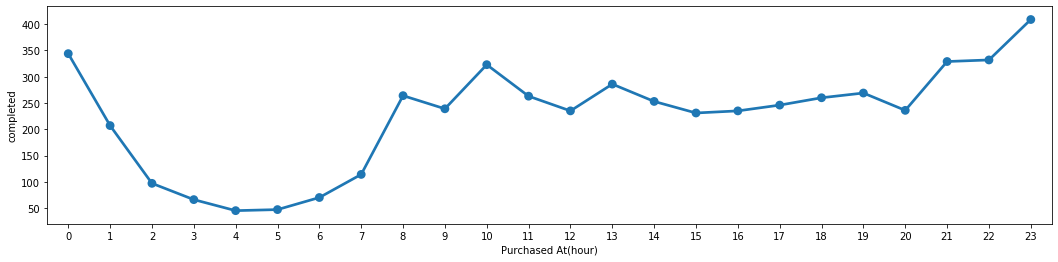

In [36]:
# 데이터 시각화 패키지 matplotlib에 명령하여, 시각화 결과를 바로 쥬피터 노트북에 출력하도록(inline) 합니다.
%matplotlib inline

# 데이터 시각화 패키지 seaborn을 읽어옵니다. 이를 sns라는 축약어로 줄여서 사용합니다.
import seaborn as sns

# 비슷하게 데이터 시각화 패키지 matplotlib를 읽어옵니다. 이를 plt라는 축약어로 줄여서 사용합니다.
import matplotlib.pyplot as plt

# matplotlib의 subplots를 사용합니다. 이 기능을 사용하면 시각화의 가로X세로 사이즈를 조절할 수 있습니다.
figure, ax = plt.subplots(nrows=1, ncols=1)

# 가로를 18인치, 세로를 4인치로 조절합니다.
figure.set_size_inches(18, 4)

# 이전에 피벗테이블로 분석한 결과를 pointplot으로 시각화합니다.
# X축은 구매 시간(Purchased At(hour))을, y축은 구매 완료 횟수를 측정합니다.
sns.pointplot(data=table.reset_index(), x="Purchased At(hour)", y="completed", ax=ax)

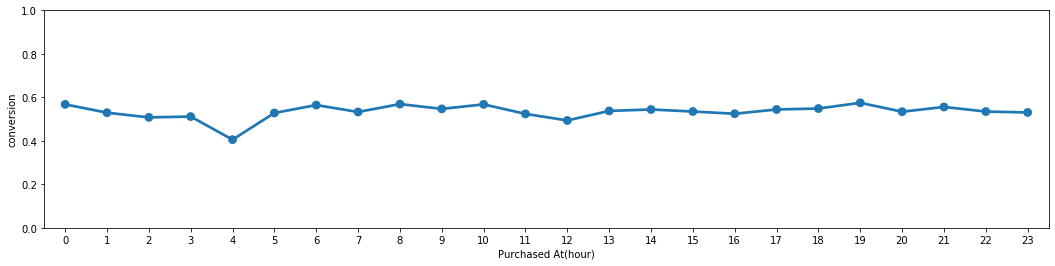

In [37]:
# matplotlib의 subplots를 사용합니다. 이 기능을 사용하면 시각화의 가로X세로 사이즈를 조절할 수 있습니다.
figure, ax = plt.subplots(nrows=1, ncols=1)

# 가로를 18인치, 세로를 4인치로 조절합니다.
figure.set_size_inches(18, 4)

# y축의 최소/최대값을 0/1로 고정합니다.
plt.ylim(0, 1)

# 이전에 피벗테이블로 분석한 결과를 pointplot으로 시각화합니다.
# X축은 구매 시간(Purchased At(hour))을, y축은 전환율(conversion)을 측정합니다.
sns.pointplot(data=table.reset_index(), x="Purchased At(hour)", y="conversion", ax=ax)

분석 결과는 다음과 같습니다.

  * 아쉽게도, 구매 시간별 전환율(conversion)은 큰 차이가 없어 보입니다, 그 의미는 특정 시간대에 구매한 사용자들이 서비스를 이탈할 확률이 높아지거나 낮아지는 현상은 없다고 볼 수 있습니다.
  * 다만 전환율과는 별개로, 주로 점심시간(10시 ~ 12시)나 새벽(23시 ~ 24시)에 구매량이 대폭 늘어난다는 것을 알 수 있습니다. 만일 광고 예산을 집행한다면 이 시기에 집중적으로 집행하거나, 무료 사용자에게 유료 사용자로 전환을 유도하는 이메일을 보냄으로써 전환율을 높이는 것은 시도해볼만 합니다.

월요일-일요일 사이의 결제/캔슬/환불 비율은 다음의 방식으로 구할 수 있습니다.

In [38]:
# 구매 시기(Purchase datetime) 컬럼에서 요일(weekday) 정보를 가져옵니다.
# 이 정보를 Purchase datetime(weekday) 라는 이름의 새로운 컬럼에 할당합니다.
data["Purchased At(weekday)"] = data["Purchased At"].dt.weekday_name

# data 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(data.shape)

# 구매 시기(Purchase datetime)와 구매 요일(Purchase datetime(weekday)) 컬럼을 찾은 뒤
# .head()로 상위 5개만 출력합니다.
data[["Purchased At", "Purchased At(weekday)"]].head()

(10000, 17)


,Purchased At,Purchased At(weekday)
Access Code,,
Y9RY2VSI,2017-04-14 19:03:29.976,Friday
3GTN3S3B,2017-05-23 20:53:54.368,Tuesday
6B0IG276,2017-08-23 23:39:21.840,Wednesday
EMGRU2MO,2017-08-28 20:18:22.824,Monday
1ELG96TX,2017-05-07 17:50:30.944,Sunday


In [39]:
# 판다스의 pivot_table을 사용합니다.
# index(세로)에는 구매 요일(Purchase datetime(weekday)(humanized))을 넣어주고,
# Columns(가로)에는 Status를 넣어줍니다.
# 그리고 aggfunc에 len을 넣어주면 cancelled, completed, refunded의 누적 개수가 나옵니다.
table = pd.pivot_table(data,
                       index="Purchased At(weekday)",
                       columns="Status",
                       values="Name",
                       aggfunc=len)

# completed, cancelled, refunded의 총 인원 수를 더해서 total이라는 새로운 컬럼을 추가합니다.
table["total"] = table["completed"] + table["cancelled"] + table["refunded"]

# 위에서 추가한 total이라는 컬럼으로 completed(결제 완료) 컬럼을 나누면 결제 확률, 일명 전환율(Conversion)이 나옵니다.
table["conversion"] = table["completed"] / table["total"]

weekday_columns = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# 이 데이터프레임의 결과를 월요일(Monday)부터 일요일(Sunday)까지 출력합니다.
table.loc[weekday_columns]

Status,cancelled,completed,refunded,total,conversion
Purchased At(weekday),,,,,
Monday,691,863,93,1647,0.523983
Tuesday,694,935,102,1731,0.540150
Wednesday,679,953,90,1722,0.553426
Thursday,616,813,88,1517,0.535926
Friday,490,674,56,1220,0.552459
Saturday,412,537,73,1022,0.525440
Sunday,428,625,88,1141,0.547765


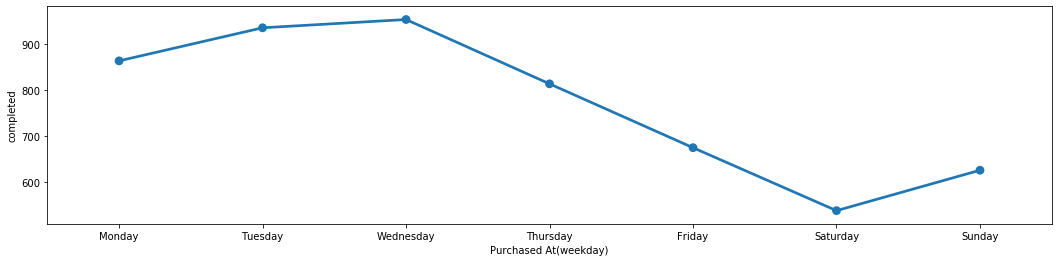

In [40]:
# matplotlib의 subplots를 사용합니다. 이 기능을 사용하면 시각화의 가로X세로 사이즈를 조절할 수 있습니다.
figure, ax = plt.subplots(nrows=1, ncols=1)

# 가로를 18인치, 세로를 4인치로 조절합니다.
figure.set_size_inches(18, 4)

# 이전에 피벗테이블로 분석한 결과를 pointplot으로 시각화합니다.
# X축은 구매 요일(Purchased At(weekday))을, y축은 구매 완료 횟수를 측정합니다.
sns.pointplot(data=table.reset_index(), x="Purchased At(weekday)", y="completed", order=weekday_columns, ax=ax)

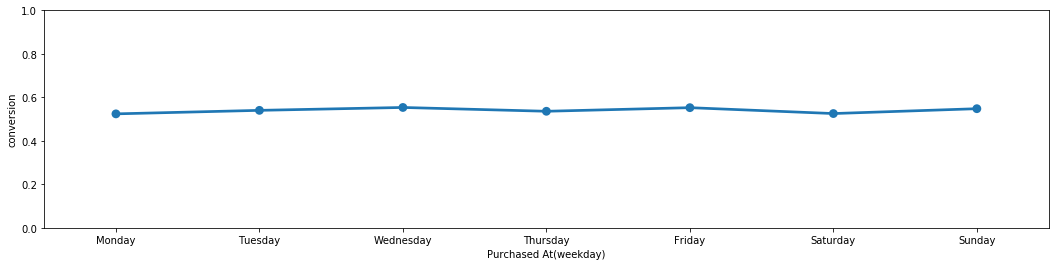

In [41]:
# matplotlib의 subplots를 사용합니다. 이 기능을 사용하면 시각화의 가로X세로 사이즈를 조절할 수 있습니다.
figure, ax = plt.subplots(nrows=1, ncols=1)

# 가로를 18인치, 세로를 4인치로 조절합니다.
figure.set_size_inches(18, 4)

# y축의 최소/최대값을 0/1로 고정합니다.
plt.ylim(0, 1)

# 이전에 피벗테이블로 분석한 결과를 pointplot으로 시각화합니다.
# X축은 구매 요일(Purchased At(weekday))을, y축은 전환율(conversion)을 측정합니다.

sns.pointplot(data=table.reset_index(), x="Purchased At(weekday)", y="conversion", order=weekday_columns, ax=ax)

분석 결과는 다음과 같습니다.

  * 구매 시간과 마찬가지로, 구매 요일별 전환율(conversion)은 큰 차이가 없어 보입니다. 어느 요일이나 마찬가지로, 구매한 사람이 서비스를 이탈하거나 남을 확률은 거의 동일합니다.
  * 하지만 사용자들은 전반적으로 주말(금-일)이 다가올수록 구매를 덜 하게되고, 주중(월-수)이 다가올수록 구매를 많이 하게 되는 현상을 발견할 수 있습니다. 이 시기에 광고 예산을 크게 집행하거나, 구매를 유도하는 메일이나 모바일 노티피케이션을 보내는 것은 좋은 아이디어입니다.

**12. 채널별 결제 / 캔슬 / 환불 비율을 알고 싶다.**

이번에는 마케팅 채널별 결제/캔슬/환불 비율을 알고 싶습니다. 현재 눔에서 눔코치를 위해 운영중인 마케팅 채널은 크게 다음과 같습니다.

In [42]:
data["Channel"].value_counts()

facebook     6880
others       1390
naver        1009
direct        297
email         271
google        120
instagram      33
Name: Channel, dtype: int64

이 채널별 마케팅 효율 정보를 알 수 있다면, 마케팅 팀에서 마케팅 예산을 재조정하여 1) 마케팅 효율이 좋은 채널에 예산을 집중하고, 2) 반대로 마케팅 효율이 좋지 않은 채널에 예산을 빼는 재조정(rebalancing)을 할 수 있습니다.

그러므로 채널별 마케팅 결제/캔슬/환불 현황을 구해주세요. 최종적으로는 다음의 결과가 출력되어야 합니다.

<table border="1" class="dataframe" style="float: left;">
   <thead>
      <tr style="text-align: right;">
         <th>Status</th>
         <th>cancelled</th>
         <th>completed</th>
         <th>refunded</th>
         <th>total</th>
         <th>conversion</th>
      </tr>
      <tr>
         <th>Channel</th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
      </tr>
   </thead>
   <tbody>
      <tr>
         <th>direct</th>
         <td>119</td>
         <td>169</td>
         <td>9</td>
         <td>297</td>
         <td>0.569024</td>
      </tr>
      <tr>
         <th>email</th>
         <td>93</td>
         <td>155</td>
         <td>23</td>
         <td>271</td>
         <td>0.571956</td>
      </tr>
      <tr>
         <th>facebook</th>
         <td>2812</td>
         <td>3654</td>
         <td>414</td>
         <td>6880</td>
         <td>0.531105</td>
      </tr>
      <tr>
         <th>google</th>
         <td>42</td>
         <td>66</td>
         <td>12</td>
         <td>120</td>
         <td>0.550000</td>
      </tr>
      <tr>
         <th>instagram</th>
         <td>13</td>
         <td>17</td>
         <td>3</td>
         <td>33</td>
         <td>0.515152</td>
      </tr>
      <tr>
         <th>naver</th>
         <td>386</td>
         <td>568</td>
         <td>55</td>
         <td>1009</td>
         <td>0.562934</td>
      </tr>
      <tr>
         <th>others</th>
         <td>545</td>
         <td>771</td>
         <td>74</td>
         <td>1390</td>
         <td>0.554676</td>
      </tr>
   </tbody>
</table>

In [43]:
# 판다스의 pivot_table을 사용합니다.
# index(세로)에는 그룹화한 마케팅 채널 (Channel)을 넣어주고,
# Columns(가로)에는 Status를 넣어줍니다.
# 그리고 aggfunc에 len을 넣어주면 cancelled, completed, refunded의 누적 개수가 나옵니다.
table = pd.pivot_table(data,
                       index="Channel",
                       columns="Status",
                       values="Name",
                       fill_value=0,
                       aggfunc=len)

# completed, cancelled, refunded의 총 인원 수를 더해서 total이라는 새로운 컬럼을 추가합니다.
table["total"] = table["completed"] + table["cancelled"] + table["refunded"]

# 위에서 추가한 total이라는 컬럼으로 completed(결제 완료) 컬럼을 나누면 결제 확률, 일명 전환율(Conversion)이 나옵니다.
table["conversion"] = table["completed"] / table["total"]

# 이 데이터프레임의 결과를 출력합니다.
table

Status,cancelled,completed,refunded,total,conversion
Channel,,,,,
direct,119,169,9,297,0.569024
email,93,155,23,271,0.571956
facebook,2812,3654,414,6880,0.531105
google,42,66,12,120,0.550000
instagram,13,17,3,33,0.515152
naver,386,568,55,1009,0.562934
others,545,771,74,1390,0.554676


이 결과를 통해 알 수 있는 정보는 다음과 같습니다.

  * 현재 가장 많은 구매가 일어나는 채널은 페이스북(facebook) 입니다. 거의 대부분의 구매가 이 채널에서 일어났습니다.
  * 구매량이 100회 이상인 채널 중 가장 전환율이 높은 채널은 이메일(email) 입니다. 이 채널은 사용자가 눔의 웹사이트에 방문한 뒤, 바로 구매하지 않고 이메일 주소만만 남겨놨을 경우에 해당됩니다.
  * 아직 구매량이 페이스북만큼 많지는 않지만, 전환률이 페이스북보다 높은 채널 중 하나는 네이버(naver)입니다. 전환율이 56%로 페이스북보다 다소 높은 편입니다.
  * 네이버만큼이나 전환율이 높은 채널은 기타(others)입니다. 이 채널은 결제율이 페이스북만큼 높음에도 불구하고, 아쉽게도 기록이 잘 되어있지 않기 때문에 분석이 어렵습니다.
  
이 분석 결과를 통해 얻을 수 있는 아이디어는 다음과 같습니다.
  
  * 먼저 내부에서 트래킹 코드나 데이터 클리닝 코드를 수정하여, 기타(others) 채널을 더 세분화시킬 필요가 있습니다. 기타 채널은 1) 페이스북 만큼이나 구매량이 많으며, 2) 전환율이 페이스북보다 높습니다. 이 채널을 더 세분화시켜 분석한다면 마케팅 효율을 높일 수 있는 새로운 아이디어가 나올 수 있습니다.
  * 페이스북 다음으로 네이버 검색채널을 집중적으로 튜닝하거나 예산을 배정하여 마케팅 채널을 다각화할 수 있습니다.
  * 이메일(email)로 들어온 사용자가 전환율이 높은 이유를 더 분석할 수 있다면 좋겠습니다. 추측컨데, 눔 코치에 대한 신뢰도를 높일 다양한 정보를 이메일로 수신하였기 때문에 다른 채널에 비해 전환율이 높다는 가설을 세울 수 있습니다. 이 가설이 맞다면, 눔 코치를 이용하는 다른 사용자에게도 동일한 정보를 제공한다면 전체 전환율을 높일 수 있을 것입니다.

### 코치 데이터와 매칭

다음은 사용자 데이터와 코치 데이터를 합쳐서 분석해보겠습니다. 코치 데이터 분석에서 가장 중요한 것은, 좋은 코칭을 하는 사람과 그렇지 못한 사람을 구분하는 것입니다.

코칭팀에서는 좋은 코칭을 하는 코치의 노하우를 정리하여 다른 코치들에게 전파할 필요가 있고, 정 반대로 좋지 않은 코칭을 하는 코치와는 개별 면담을 통해 코칭 퀄리티를 높여야 합니다. 좋은 코칭과 좋지 않은 코칭은 결제 비율과 캔슬 비율, 그리고 환불 비율로 판단할 수 있습니다.

이번에는 데이터 분석을 통해 눔 코치 서비스의 코칭 만족도를 분석해보겠습니다.

In [44]:
# 먼저 코칭 데이터를 가져옵니다.
# 이 결과를 coach라는 이름의 변수에 할당합니다.
coach = pd.read_csv("data/noom/noom_coach.csv", index_col="Access Code")

# coach 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(coach.shape)

# coach 데이터의 상위 5개를 출력합니다.
coach.head()

(10000, 100)


,정은오 코치(VEV4PGJB),오승혁 코치(VENPKBP9),조소은 코치(D0WASBXN),고영재 코치(C91AVNGB),조수민 코치(OBCAO3W0),강채아 코치(WH2NIKCO),황다훈 코치(1I6IWURH),백슬은 코치(228BFB50),유채우 코치(IW53Y9AW),송지선 코치(WL0877P7),...,오초빈 코치(A3WOLAQM),서수정 코치(F36LORFC),정서율 코치(LX1G7EMD),고우재 코치(SKNL9Z4P),문한규 코치(OU1WVDGA),황세안 코치(3QUBQAVE),홍성은 코치(2I3QJQ5O),고성은 코치(34T7XPYR),백한율 코치(HPWAN8R0),안슬은 코치(QAVWJSZ1)
Access Code,,,,,,,,,,,,,,,,,,,,,
Y9RY2VSI,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3GTN3S3B,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6B0IG276,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EMGRU2MO,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1ELG96TX,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


여기서 인덱스(index)는 눔 코치 사용자들의 아이디(```Access Code```), 열(column)은 코치들의 이름과 아이디(```Access Code```)입니다. 값은 코치가 사용자에게 코칭을 한 횟수를 나타냅니다. (한 명의 사용자가 여러 명의 코치에게 코칭을 받는 것도 가능합니다)

**13. 기존의 데이터와 코치 데이터를 합쳐주세요.** 

먼저 기존 데이터와 코치 데이터를 하나로 합쳐야 분석을 할 수 있습니다. 두 개의 데이터를 하나로 합쳐주세요. 판다스(Pandas)로 데이터를 합치는 방법은 [Merge, join, and concatenate](https://pandas.pydata.org/pandas-docs/stable/merging.html) 를 참고하시면 됩니다. 최종적으로는 다음의 결과가 출력되야 합니다.

<table border="1" class="dataframe">
   <thead>
      <tr style="text-align: right;">
         <th></th>
         <th>Name</th>
         <th>Status</th>
         <th>&#51221;&#51008;&#50724; &#53076;&#52824;(VEV4PGJB)</th>
         <th>&#50724;&#49849;&#54785; &#53076;&#52824;(VENPKBP9)</th>
         <th>&#51312;&#49548;&#51008; &#53076;&#52824;(D0WASBXN)</th>
         <th>&#44256;&#50689;&#51116; &#53076;&#52824;(C91AVNGB)</th>
         <th>&#51312;&#49688;&#48124; &#53076;&#52824;(OBCAO3W0)</th>
         <th>&#44053;&#52292;&#50500; &#53076;&#52824;(WH2NIKCO)</th>
         <th>&#54889;&#45796;&#54984; &#53076;&#52824;(1I6IWURH)</th>
         <th>&#48177;&#49836;&#51008; &#53076;&#52824;(228BFB50)</th>
         <th>&#50976;&#52292;&#50864; &#53076;&#52824;(IW53Y9AW)</th>
         <th>&#49569;&#51648;&#49440; &#53076;&#52824;(WL0877P7)</th>
         <th>&#54728;&#49457;&#50896; &#53076;&#52824;(9124O1IH)</th>
         <th>&#52572;&#49436;&#50984; &#53076;&#52824;(UVZALFE3)</th>
         <th>&#50980;&#52292;&#50980; &#53076;&#52824;(U95EGIDM)</th>
         <th>&#54728;&#49836;&#51648; &#53076;&#52824;(DWVG5IFL)</th>
         <th>&#44608;&#49836;&#48124; &#53076;&#52824;(CWI0ABRI)</th>
         <th>&#51221;&#46041;&#51064; &#53076;&#52824;(UQN9899Z)</th>
         <th>&#50724;&#49884;&#54788; &#53076;&#52824;(7XM3L93F)</th>
         <th>&#44608;&#49436;&#51008; &#53076;&#52824;(FOT4SH4F)</th>
         <th>&#47928;&#49440;&#50500; &#53076;&#52824;(W5AZL2WT)</th>
         <th>&#44608;&#50980; &#52292; &#53076;&#52824;(COZ180VA)</th>
         <th>&#50577;&#49436;&#50984; &#53076;&#52824;(A2A98OA6)</th>
         <th>&#44428;&#49836;&#50689; &#53076;&#52824;(E3GD4106)</th>
         <th>&#48149;&#49457;&#54788; &#53076;&#52824;(JKKV62JR)</th>
         <th>&#51312;&#49444;&#50689; &#53076;&#52824;(U7L98DAO)</th>
         <th>&#48177;&#49464;&#50896; &#53076;&#52824;(2Z1S5CYM)</th>
         <th>&#51312;&#51648;&#50696; &#53076;&#52824;(ZA6B8Y4I)</th>
         <th>&#54889;&#49444;&#50672; &#53076;&#52824;(RJEZWP8M)</th>
         <th>&#50980;&#46020;&#50896; &#53076;&#52824;(IOVT84RW)</th>
         <th>&#44428;&#49548;&#48124; &#53076;&#52824;(OM3X0HPF)</th>
         <th>&#49552;&#49457;&#50500; &#53076;&#52824;(DE2CQ3UB)</th>
         <th>&#47928;&#52292;&#54785; &#53076;&#52824;(9JP9WCLH)</th>
         <th>&#49888;&#52292;&#49556; &#53076;&#52824;(01CM47G7)</th>
         <th>&#50980;&#51456;&#54840; &#53076;&#52824;(RGSJNWC1)</th>
         <th>&#54889;&#49884;&#51456; &#53076;&#52824;(M7EJJXFT)</th>
         <th>&#48176;&#49836;&#48120; &#53076;&#52824;(ZT7MO305)</th>
         <th>&#54728;&#49436;&#48712; &#53076;&#52824;(AKR0QZ53)</th>
         <th>&#54728;&#50696;&#52268; &#53076;&#52824;(2F23UZOK)</th>
         <th>&#44428;&#50980;&#54980; &#53076;&#52824;(2JNSCXG9)</th>
         <th>&#48177;&#49464;&#48124; &#53076;&#52824;(P770M0WG)</th>
         <th>&#51221;&#54952;&#51456; &#53076;&#52824;(W9MLRQ03)</th>
         <th>&#49569;&#49836;&#55148; &#53076;&#52824;(UXFNB9P9)</th>
         <th>&#51221;&#54952;&#49457; &#53076;&#52824;(E1RQ3HCM)</th>
         <th>&#50724;&#49884;&#54785; &#53076;&#52824;(6NJXI005)</th>
         <th>&#50724;&#46041;&#50756; &#53076;&#52824;(0O48DQCH)</th>
         <th>&#51076;&#49836;&#51648; &#53076;&#52824;(TXKB5IPL)</th>
         <th>&#51312;&#49436;&#50689; &#53076;&#52824;(0VG1N1M4)</th>
         <th>&#48149;&#49457;&#48124; &#53076;&#52824;(Z3EDAX7O)</th>
         <th>&#52572;&#51060;&#54984; &#53076;&#52824;(F9BXHUIW)</th>
         <th>&#49888;&#52264;&#48124; &#53076;&#52824;(BXQNFYSE)</th>
         <th>&#50504;&#52292;&#54788; &#53076;&#52824;(WEURSEW0)</th>
         <th>&#51312;&#50864;&#52268; &#53076;&#52824;(WWN531JQ)</th>
         <th>&#44608;&#52268;&#54785; &#53076;&#52824;(ZPKK20QU)</th>
         <th>&#48176;&#49556;&#50980; &#53076;&#52824;(WC0AC6ME)</th>
         <th>&#49569;&#51648;&#50504; &#53076;&#52824;(2MNIJN3F)</th>
         <th>&#49552;&#52292;&#50500; &#53076;&#52824;(BL3GH0DR)</th>
         <th>&#50504;&#49457;&#51008; &#53076;&#52824;(Z58HLXF1)</th>
         <th>&#54620;&#46041;&#54620; &#53076;&#52824;(TSFSQH0A)</th>
         <th>&#54889;&#49548;&#50689; &#53076;&#52824;(91YZ8NY0)</th>
         <th>&#48177;&#49444;&#55148; &#53076;&#52824;(EAIJXNHP)</th>
         <th>&#47928;&#49464;&#55148; &#53076;&#52824;(7NQPBZK3)</th>
         <th>&#54889;&#51116;&#50864; &#53076;&#52824;(YIFMV1GQ)</th>
         <th>&#51076;&#49836;&#48124; &#53076;&#52824;(GWF6MDWP)</th>
         <th>&#48149;&#46020;&#50689; &#53076;&#52824;(I4KVQ5G0)</th>
         <th>&#54728;&#49688;&#50672; &#53076;&#52824;(Z6YFPL34)</th>
         <th>&#54728;&#51452;&#50896; &#53076;&#52824;(71T6JNK0)</th>
         <th>&#51060;&#51648;&#50696; &#53076;&#52824;(Z77MI98E)</th>
         <th>&#51109;&#51648;&#54952; &#53076;&#52824;(XBJH0VO3)</th>
         <th>&#49888;&#49688;&#50672; &#53076;&#52824;(4274HJ8M)</th>
         <th>&#50504;&#52292;&#50980; &#53076;&#52824;(IAYRGMJ2)</th>
         <th>&#44608;&#50980;&#44508; &#53076;&#52824;(E7BBXJHO)</th>
         <th>&#50724;&#49688;&#51652; &#53076;&#52824;(9ZKGH8EO)</th>
         <th>&#48149;&#49436;&#50672; &#53076;&#52824;(5NXNMBCN)</th>
         <th>&#51204;&#51648;&#50756; &#53076;&#52824;(P6QG38DS)</th>
         <th>&#48177;&#52292;&#54984; &#53076;&#52824;(89CN5XHA)</th>
         <th>&#48177;&#51008;&#49457; &#53076;&#52824;(WWFBXFX6)</th>
         <th>&#47928;&#49548;&#50980; &#53076;&#52824;(2WDVTB40)</th>
         <th>&#54620;&#46041;&#50696; &#53076;&#52824;(OD8IV4Q5)</th>
         <th>&#44428;&#49884;&#50980; &#53076;&#52824;(4MEMXAVM)</th>
         <th>&#51312;&#52488;&#50672; &#53076;&#52824;(3JBE9GKO)</th>
         <th>&#51312;&#49688;&#50500; &#53076;&#52824;(V5CSCQ45)</th>
         <th>&#44053;&#51648;&#55148; &#53076;&#52824;(NOEP7X8B)</th>
         <th>&#47928;&#49849;&#54785; &#53076;&#52824;(6LHXIU5N)</th>
         <th>&#48149;&#49457;&#51008; &#53076;&#52824;(4KO70A9P)</th>
         <th>&#47928;&#49440;&#55148; &#53076;&#52824;(NTELEEEO)</th>
         <th>&#44053;&#51008;&#50864; &#53076;&#52824;(EJIHL7OE)</th>
         <th>&#51109;&#49849;&#55148; &#53076;&#52824;(85BWE3V1)</th>
         <th>&#44256;&#49688;&#51060; &#53076;&#52824;(NKHXTMRU)</th>
         <th>&#51204;&#51648;&#54788; &#53076;&#52824;(SQHB3H66)</th>
         <th>&#49552;&#49688;&#50672; &#53076;&#52824;(Z5GQG6SI)</th>
         <th>&#49888;&#49457;&#48712; &#53076;&#52824;(7CIDQT0X)</th>
         <th>&#50724;&#52488;&#48712; &#53076;&#52824;(A3WOLAQM)</th>
         <th>&#49436;&#49688;&#51221; &#53076;&#52824;(F36LORFC)</th>
         <th>&#51221;&#49436;&#50984; &#53076;&#52824;(LX1G7EMD)</th>
         <th>&#44256;&#50864;&#51116; &#53076;&#52824;(SKNL9Z4P)</th>
         <th>&#47928;&#54620;&#44508; &#53076;&#52824;(OU1WVDGA)</th>
         <th>&#54889;&#49464;&#50504; &#53076;&#52824;(3QUBQAVE)</th>
         <th>&#54861;&#49457;&#51008; &#53076;&#52824;(2I3QJQ5O)</th>
         <th>&#44256;&#49457;&#51008; &#53076;&#52824;(34T7XPYR)</th>
         <th>&#48177;&#54620;&#50984; &#53076;&#52824;(HPWAN8R0)</th>
         <th>&#50504;&#49836;&#51008; &#53076;&#52824;(QAVWJSZ1)</th>
      </tr>
      <tr>
         <th>Access Code</th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
      </tr>
   </thead>
   <tbody>
      <tr>
         <th>Y9RY2VSI</th>
         <td>&#44608;&#49849;&#54812;</td>
         <td>completed</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>1</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
      </tr>
      <tr>
         <th>3GTN3S3B</th>
         <td>&#54728;&#49849;&#51456;</td>
         <td>completed</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>2</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>2</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>1</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
      </tr>
      <tr>
         <th>6B0IG276</th>
         <td>&#51060;&#51648;&#48124;</td>
         <td>completed</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
      </tr>
      <tr>
         <th>EMGRU2MO</th>
         <td>&#51109;&#49444;&#50980;</td>
         <td>completed</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>1</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
      </tr>
      <tr>
         <th>1ELG96TX</th>
         <td>&#49436;&#49457;&#48712;</td>
         <td>completed</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>1</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
         <td>0</td>
      </tr>
   </tbody>
</table>

힌트: pd.[concat](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.concat.html)을 사용하면 편하게 두 개의 데이터프레임을 합칠 수 있습니다.

In [45]:
# 전체 데이터에서 코치의 퍼포먼스를 체크하는데 필요한 데이터만을 가져옵니다.
# 이름(Name)과 결제 여부(Status)만 있으면 충분합니다.
# 이 데이터를 core_data라는 이름의 변수에 할당합니다.
core_data = data[["Name", "Status"]]

# core_data 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(core_data.shape)

# core_data 데이터의 상위 5개를 출력합니다.
core_data.head()

(10000, 2)


,Name,Status
Access Code,,
Y9RY2VSI,김승혜,completed
3GTN3S3B,허승준,completed
6B0IG276,이지민,completed
EMGRU2MO,장설윤,completed
1ELG96TX,서성빈,completed


In [46]:
# 기존 데이터와 코치 데이터를 판다스의 concat을 활용해 하나로 합칩니다.
# 이렇게 하면 인덱스에 해당하는 Access Code를 기준으로 하나로 합쳐집니다.
# 이 결과를 coach_data라는 이름의 새로운 데이터로 받습니다.
coach_data = pd.concat([core_data, coach], axis=1)

# coach_data 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(coach_data.shape)

# coach_data 데이터의 상위 5개를 출력합니다.
coach_data.head()

(10000, 102)


,Name,Status,정은오 코치(VEV4PGJB),오승혁 코치(VENPKBP9),조소은 코치(D0WASBXN),고영재 코치(C91AVNGB),조수민 코치(OBCAO3W0),강채아 코치(WH2NIKCO),황다훈 코치(1I6IWURH),백슬은 코치(228BFB50),...,오초빈 코치(A3WOLAQM),서수정 코치(F36LORFC),정서율 코치(LX1G7EMD),고우재 코치(SKNL9Z4P),문한규 코치(OU1WVDGA),황세안 코치(3QUBQAVE),홍성은 코치(2I3QJQ5O),고성은 코치(34T7XPYR),백한율 코치(HPWAN8R0),안슬은 코치(QAVWJSZ1)
Access Code,,,,,,,,,,,,,,,,,,,,,
Y9RY2VSI,김승혜,completed,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3GTN3S3B,허승준,completed,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6B0IG276,이지민,completed,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EMGRU2MO,장설윤,completed,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1ELG96TX,서성빈,completed,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**14. 코치별 담당 사용자(total) / 구매 완료 횟수(completed) / 캔슬 횟수(canceled) / 환불 횟수(refunded)를 구해주세요.**

이 수치를 통해 좋은 코칭을 하는 사람과 좋은 코칭을 하지 못하는 사람을 구분할 수 있습니다. 최종적으로는 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
   <thead>
      <tr style="text-align: right;">
         <th>Status</th>
         <th>cancelled</th>
         <th>completed</th>
         <th>refunded</th>
      </tr>
   </thead>
   <tbody>
      <tr>
         <th>&#51221;&#51008;&#50724; &#53076;&#52824;(VEV4PGJB)</th>
         <td>18</td>
         <td>23</td>
         <td>3</td>
      </tr>
      <tr>
         <th>&#50724;&#49849;&#54785; &#53076;&#52824;(VENPKBP9)</th>
         <td>14</td>
         <td>44</td>
         <td>9</td>
      </tr>
      <tr>
         <th>&#51312;&#49548;&#51008; &#53076;&#52824;(D0WASBXN)</th>
         <td>12</td>
         <td>12</td>
         <td>1</td>
      </tr>
      <tr>
         <th>&#44256;&#50689;&#51116; &#53076;&#52824;(C91AVNGB)</th>
         <td>22</td>
         <td>27</td>
         <td>4</td>
      </tr>
      <tr>
         <th>&#51312;&#49688;&#48124; &#53076;&#52824;(OBCAO3W0)</th>
         <td>49</td>
         <td>46</td>
         <td>8</td>
      </tr>
   </tbody>
</table>

In [47]:
tmp = coach_data.pivot_table(index='Status', aggfunc='sum', margins=True).T

tmp.head()

Status,cancelled,completed,refunded,All
강은우 코치(EJIHL7OE),122,171,16,309
강지희 코치(NOEP7X8B),15,19,1,35
강채아 코치(WH2NIKCO),9,10,2,21
고성은 코치(34T7XPYR),24,36,1,61
고수이 코치(NKHXTMRU),6,5,1,12


In [48]:
# 코치의 코칭 데이터에서, 결제 상태(Status)를 기준으로 그룹핑한 다음에 전부 더합니다.
coach_performance = coach_data.groupby("Status").sum()

# coach_performance 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(coach_performance.shape)

# coach_performance 데이터의 상위 5개를 출력합니다.
coach_performance.head()

(3, 100)


,정은오 코치(VEV4PGJB),오승혁 코치(VENPKBP9),조소은 코치(D0WASBXN),고영재 코치(C91AVNGB),조수민 코치(OBCAO3W0),강채아 코치(WH2NIKCO),황다훈 코치(1I6IWURH),백슬은 코치(228BFB50),유채우 코치(IW53Y9AW),송지선 코치(WL0877P7),...,오초빈 코치(A3WOLAQM),서수정 코치(F36LORFC),정서율 코치(LX1G7EMD),고우재 코치(SKNL9Z4P),문한규 코치(OU1WVDGA),황세안 코치(3QUBQAVE),홍성은 코치(2I3QJQ5O),고성은 코치(34T7XPYR),백한율 코치(HPWAN8R0),안슬은 코치(QAVWJSZ1)
Status,,,,,,,,,,,,,,,,,,,,,
cancelled,18,14,12,22,49,9,113,13,4,7,...,124,48,91,82,32,48,73,24,0,3
completed,23,44,12,27,46,10,155,10,2,18,...,150,53,125,96,33,61,112,36,1,5
refunded,3,9,1,4,8,2,24,2,0,1,...,27,2,15,11,2,8,9,1,0,1


In [49]:
# coach_performance 데이터를 전치(Transpose)합니다.
# 이렇게 하면 조금 더 보기에 편할 것 같습니다.
coach_performance = coach_performance.T

# coach_performance 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(coach_performance.shape)

# coach_performance 데이터의 상위 5개를 출력합니다.
coach_performance.head()

(100, 3)


Status,cancelled,completed,refunded
정은오 코치(VEV4PGJB),18,23,3
오승혁 코치(VENPKBP9),14,44,9
조소은 코치(D0WASBXN),12,12,1
고영재 코치(C91AVNGB),22,27,4
조수민 코치(OBCAO3W0),49,46,8


**15. 코치별 전환율(conversion rate) / 취소율(cancellation rate)를 계산해주세요.**

여기서 전환율은 전체 구매자 대비 구매 완료(completed)를 한 사람, 취소율은 전체 구매자 대비 취소(cancelled)나 환불(refunded)을 한 사람을 나타냅니다. 이 두 개를 구한 뒤, 1) 전환율이 높은 코치, 2) 취소율이 높은 코치 순으로 정렬해주세요. 단 모수가 부족한 경우를 배제하기 위해, 코칭을 100회 이상 하지 않은 사용자는 배제하도록 하겠습니다.

전환율이 높을수록 해당 코치가 고객에게 만족스러운 코칭을 제공한다고 볼 수 있으며, 해당 코치의 노하우를 다른 코치들에게 전파할 수 있도록 노력해야 합니다. 최종적으로 다음의 결과가 나와야 합니다.


<table border="1" class="dataframe" style="float: left;">
   <thead>
      <tr style="text-align: right;">
         <th>Status</th>
         <th>cancelled</th>
         <th>completed</th>
         <th>refunded</th>
         <th>total</th>
         <th>conversion rate</th>
         <th>cancellation rate</th>
      </tr>
   </thead>
   <tbody>
      <tr>
         <th>&#51312;&#50864;&#52268; &#53076;&#52824;(WWN531JQ)</th>
         <td>36</td>
         <td>65</td>
         <td>6</td>
         <td>107</td>
         <td>0.607477</td>
         <td>0.392523</td>
      </tr>
      <tr>
         <th>&#54728;&#49836;&#51648; &#53076;&#52824;(DWVG5IFL)</th>
         <td>43</td>
         <td>71</td>
         <td>3</td>
         <td>117</td>
         <td>0.606838</td>
         <td>0.393162</td>
      </tr>
      <tr>
         <th>&#54728;&#49457;&#50896; &#53076;&#52824;(9124O1IH)</th>
         <td>43</td>
         <td>76</td>
         <td>7</td>
         <td>126</td>
         <td>0.603175</td>
         <td>0.396825</td>
      </tr>
      <tr>
         <th>&#51312;&#49444;&#50689; &#53076;&#52824;(U7L98DAO)</th>
         <td>48</td>
         <td>78</td>
         <td>6</td>
         <td>132</td>
         <td>0.590909</td>
         <td>0.409091</td>
      </tr>
      <tr>
         <th>&#44428;&#49836;&#50689; &#53076;&#52824;(E3GD4106)</th>
         <td>42</td>
         <td>70</td>
         <td>9</td>
         <td>121</td>
         <td>0.578512</td>
         <td>0.421488</td>
      </tr>
   </tbody>
</table>

반면 취소율이 높을수록 해당 코치가 고객에게 만족스럽지 않은 코칭을 제공한다고 볼 수 있습니다. 이럴 경우 구체적으로 어떤 부분에서 문제가 생겼는지를 코칭팀에서 파악하여 이를 수정할 수 있어야 합니다. 최종적으로는 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
   <thead>
      <tr style="text-align: right;">
         <th>Status</th>
         <th>cancelled</th>
         <th>completed</th>
         <th>refunded</th>
         <th>total</th>
         <th>conversion rate</th>
         <th>cancellation rate</th>
      </tr>
   </thead>
   <tbody>
      <tr>
         <th>&#51312;&#49688;&#48124; &#53076;&#52824;(OBCAO3W0)</th>
         <td>49</td>
         <td>46</td>
         <td>8</td>
         <td>103</td>
         <td>0.446602</td>
         <td>0.553398</td>
      </tr>
      <tr>
         <th>&#48149;&#46020;&#50689; &#53076;&#52824;(I4KVQ5G0)</th>
         <td>77</td>
         <td>70</td>
         <td>6</td>
         <td>153</td>
         <td>0.457516</td>
         <td>0.542484</td>
      </tr>
      <tr>
         <th>&#50724;&#46041;&#50756; &#53076;&#52824;(0O48DQCH)</th>
         <td>55</td>
         <td>56</td>
         <td>7</td>
         <td>118</td>
         <td>0.474576</td>
         <td>0.525424</td>
      </tr>
      <tr>
         <th>&#51312;&#52488;&#50672; &#53076;&#52824;(3JBE9GKO)</th>
         <td>55</td>
         <td>56</td>
         <td>5</td>
         <td>116</td>
         <td>0.482759</td>
         <td>0.517241</td>
      </tr>
      <tr>
         <th>&#50724;&#52488;&#48712; &#53076;&#52824;(A3WOLAQM)</th>
         <td>124</td>
         <td>150</td>
         <td>27</td>
         <td>301</td>
         <td>0.498339</td>
         <td>0.501661</td>
      </tr>
   </tbody>
</table>

In [50]:
# completed, cancelled, refunded의 총 인원 수를 더해서 total이라는 새로운 컬럼을 추가합니다.
coach_performance["total"] = coach_performance["completed"] + coach_performance["cancelled"] + coach_performance["refunded"]

# 위에서 추가한 total이라는 컬럼으로 completed(결제 완료) 컬럼을 나누면 구매 확률, 일명 전환율(conversion rate)이 나옵니다.
coach_performance["conversion rate"] = coach_performance["completed"] / coach_performance["total"]

# 캔슬 인원 수(cancelled)와 환불 인원 수(refunded) 에 총 인원(total)을 나눠서 취소율(cancellation rate)을 계산합니다.
coach_performance["cancellation rate"] = (coach_performance["cancelled"] + coach_performance["refunded"]) / coach_performance["total"]

# 이 데이터프레임의 결과를 출력합니다.
coach_performance.head()

Status,cancelled,completed,refunded,total,conversion rate,cancellation rate
정은오 코치(VEV4PGJB),18,23,3,44,0.522727,0.477273
오승혁 코치(VENPKBP9),14,44,9,67,0.656716,0.343284
조소은 코치(D0WASBXN),12,12,1,25,0.480000,0.520000
고영재 코치(C91AVNGB),22,27,4,53,0.509434,0.490566
조수민 코치(OBCAO3W0),49,46,8,103,0.446602,0.553398


In [51]:
# 모수가 적은 경우를 배제하기 위해, 최소 100명의 고객을 코칭한 코치만을 대상으로 계산합니다.
coach_performance_experts = coach_performance[coach_performance["total"] >= 100]

# coach_performance_experts 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(coach_performance_experts.shape)

# coach_performance_experts 데이터의 상위 5개를 출력합니다.
coach_performance_experts.head()

(47, 6)


Status,cancelled,completed,refunded,total,conversion rate,cancellation rate
조수민 코치(OBCAO3W0),49,46,8,103,0.446602,0.553398
황다훈 코치(1I6IWURH),113,155,24,292,0.530822,0.469178
허성원 코치(9124O1IH),43,76,7,126,0.603175,0.396825
최서율 코치(UVZALFE3),139,164,25,328,0.500000,0.500000
윤채윤 코치(U95EGIDM),52,65,9,126,0.515873,0.484127


In [52]:
# 전환율(conversion)을 기준으로 가장 결제율이 높은 사람 상위 5개를 출력합니다.
coach_performance_experts.sort_values(by="conversion rate", ascending=False).head()

Status,cancelled,completed,refunded,total,conversion rate,cancellation rate
조우찬 코치(WWN531JQ),36,65,6,107,0.607477,0.392523
허슬지 코치(DWVG5IFL),43,71,3,117,0.606838,0.393162
허성원 코치(9124O1IH),43,76,7,126,0.603175,0.396825
조설영 코치(U7L98DAO),48,78,6,132,0.590909,0.409091
권슬영 코치(E3GD4106),42,70,9,121,0.578512,0.421488


In [53]:
# 캔슬 비율(cancellation rate)을 기준으로 가장 캔슬 비율이 낮은 사람 상위 5개를 출력합니다.
coach_performance_experts.sort_values(by="cancellation rate", ascending=False).head()

Status,cancelled,completed,refunded,total,conversion rate,cancellation rate
조수민 코치(OBCAO3W0),49,46,8,103,0.446602,0.553398
박도영 코치(I4KVQ5G0),77,70,6,153,0.457516,0.542484
오동완 코치(0O48DQCH),55,56,7,118,0.474576,0.525424
조초연 코치(3JBE9GKO),55,56,5,116,0.482759,0.517241
오초빈 코치(A3WOLAQM),124,150,27,301,0.498339,0.501661


이제 이 결과를 바탕으로, 고객에게 만족도를 높일 수 있도록 코칭을 개선할 수 있을 것입니다.